<a href="https://colab.research.google.com/github/phu0n9/hospital_dataset/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement

The delayed discharge in hospitals is a considerable problem over the years although length of stay (LOS) has significantly decreased. The issue is prompted by the rise in elderly population as well as in higher level of health deformity. Discharging patients with qualified conditions creates capacity and maintains a creditability between patients and health staffs. Several concerns for prolonged LOS are that it may cause patients to be diagonally infected among the hospital environment and patient overflow, unnecessary cost surge for both sides [1]. Though, the delay is a result of under-qualified facility after discharging, patients’ irresponsible family, lacking in willingness to be discharge and hospitals’ pressure of financial penalty from Medicare. The discharging issue is a big concern, however, never been carefully taken into account by the healthcare team perspectives.




The effects of COVIS -19 pandemic further burst an urge to efficiently make use of treating beds in hospitals as the demands increase dramatically. However, if discharging patiently earlier than expected, readmitting patients could be another serious roadblock [2]. Therefore, a guideline for hospitals to find out the chance of clinical reoccurrence affecting patients’ health that could lead to readmission after suffering from COVID-19 is taken into consideration.

# Data structure & Visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




```
 Import Libraries
```


In [ ]:
import pandas as pd 
import numpy as np
from scipy import stats
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile
import plotly.graph_objects as go



```
Importing data
```


In [ ]:
zip_file = ZipFile('/content/drive/MyDrive/Sem 1-2021/Machine Learning/COSC2673_2793_Assign1_Data.zip')
df = pd.read_csv(zip_file.open('train_data.csv'), header=0, sep=',', quotechar='"',delimiter=",")
df.head()

,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,1,New York City,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,2,New York City,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,3,New York City,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,4,New York City,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,5,New York City,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


In [ ]:
df.describe()

,ID,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,29983.500000,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405
std,17310.837458,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246
min,1.000000,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000
25%,14992.250000,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000
50%,29983.500000,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000
75%,44974.750000,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000
max,59966.000000,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000


In [ ]:
df.drop(['HealthServiceArea','ID'],inplace=True,axis=1)

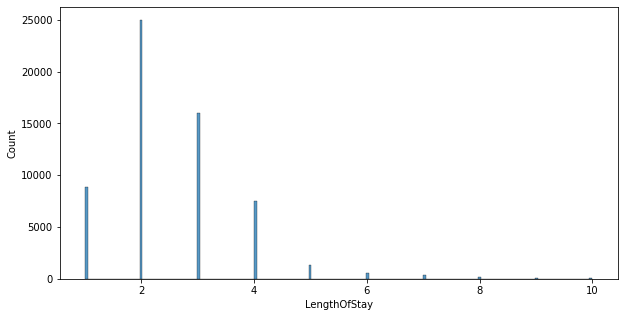

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10, 5)
sns.histplot(df['LengthOfStay'])

In [ ]:
df['LengthOfStay'].describe()

count    59966.000000
mean         2.538405
std          1.171246
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: LengthOfStay, dtype: float64

As seen from the graph above, the propotion of discharging patients after 3 days are considerably lower. Moreover, it can be observed that patients tend to stay in the hospital within 2 days. Therefore, if the target Length of Stay (LOS) is converted to 0 (within 3 days) and 1 (more than 3 days), the data is unbalanced.

# Visualization

In [ ]:
df.describe()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405
std,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246
min,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000
25%,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000
50%,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000
75%,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000
max,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000


## Convert length of stay

In [ ]:
def convert_length_of_stay(dom) :
    if dom < 4:
      res = 0
    else:
      res = 1
    return res

df['LengthOfStay'] = df.apply(lambda x : convert_length_of_stay(x['LengthOfStay']), axis=1)

In [ ]:
df.head(10)

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,0
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,0
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,0
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,0
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,0
5,M,White,Newborn,228,1,Medicaid,3700,N,2611,9227,1866,4774,45,0
6,F,Other Race,Newborn,228,1,Private Health Insurance,3400,N,3155,11381,5826,15680,74,0
7,M,White,Newborn,220,1,Private Health Insurance,2900,N,2611,9227,1681,8131,45,0
8,M,White,Newborn,220,1,Medicaid,3300,N,2041,9917,1374,13345,104,0
9,M,Other Race,Emergency,231,2,Private Health Insurance,2600,Y,3155,11381,1533,12454,74,0


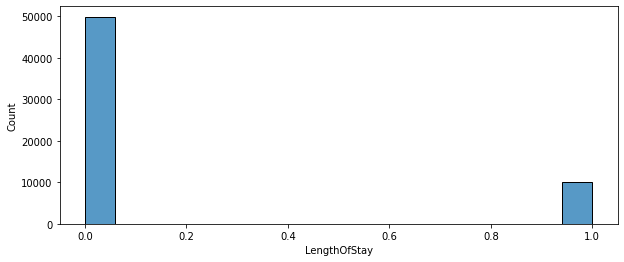

In [ ]:
fig = plt.gcf()
fig.set_size_inches(10, 4)
sns.histplot(df['LengthOfStay'])

As presented above, the dataset is imbalanced and the propotion of 0 is much more than 1.





This function below is to conduct a hypothesis if a column is normally distributed or not. The alpha is set as 0.05 as a benchmark for the p-value. 

In [ ]:
alpha = 0.05
from scipy import stats
def check_normal_distribution(dom):
  a,b = stats.normaltest(dom)
  if b <= alpha:
    print(dom.name," p-value ",b," is NOT normally distributed.")
  else:
    print(dom.name," p-value ",b," is normally distributed.")
check_normal_distribution(df['BirthWeight'])
check_normal_distribution(df['AverageCostInCounty'])
check_normal_distribution(df['AverageChargesInCounty'])
check_normal_distribution(df['AverageCostInFacility'])
check_normal_distribution(df['AverageChargesInFacility'])

BirthWeight  p-value  0.0  is NOT normally distributed.
AverageCostInCounty  p-value  0.0  is NOT normally distributed.
AverageChargesInCounty  p-value  0.0  is NOT normally distributed.
AverageCostInFacility  p-value  0.0  is NOT normally distributed.
AverageChargesInFacility  p-value  0.0  is NOT normally distributed.


For the AverageIncomeInZipCode column, it is thought to be numerical data, however, after doing some research on the US Income Zip Code [3], the first 2 or 3 number of the Zip code column in this page is the state which are represented in the column. Therefore, the number in this column in the average income of that patient in that particular area. For example, 104 represents for NY(New York). Therefore, it will be kept as categorical data.



[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

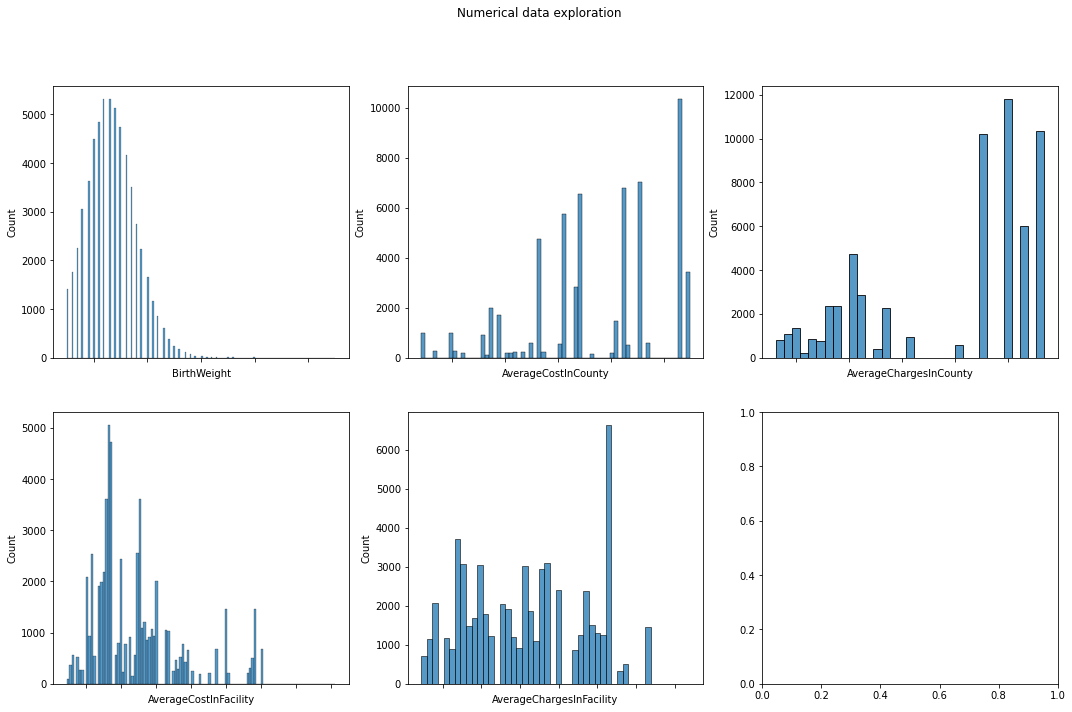

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 11))
fig.suptitle('Numerical data exploration')
ax = sns.histplot (df['BirthWeight'],ax=axes[0][0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax= sns.histplot(df['AverageCostInCounty'],ax=axes[0][1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax= sns.histplot(df['AverageChargesInCounty'],ax=axes[0][2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

ax= sns.histplot(df['AverageCostInFacility'],ax=axes[1][0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax= sns.histplot(df['AverageChargesInFacility'],ax=axes[1][1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

The test case and the graph above illustrate that the numerical data in this dataset is not normally distributed. 

In [ ]:
df['BirthWeight'].describe().to_frame()

,BirthWeight
count,59966.000000
mean,3336.298903
std,446.244475
min,2500.000000
25%,3000.000000
50%,3300.000000
75%,3600.000000
max,7500.000000


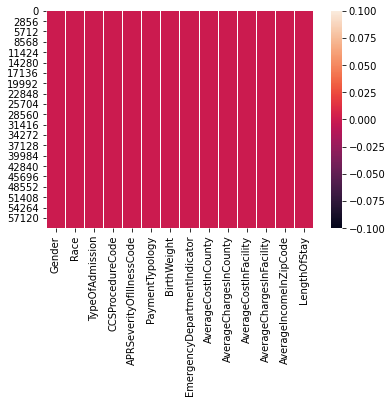

In [ ]:
sns.heatmap(df.isnull())

The dataset is quite clean and no null values are presented in the graph above.

# Pre-processing data

In the dataset, before applying machine learning models, some categorical columns should be encoded to numerical data, otherwise, it will be displayed as errors. 
There are three ways of doing this using Label Encoder, One hot encoding and get_dummies. In this paper, label encoder is applied.

## Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
def change_label_encoder(dom):
  le = LabelEncoder()
  dom = le.fit_transform(dom)
  return dom

df['TypeOfAdmission'] = change_label_encoder(df['TypeOfAdmission'])
df['PaymentTypology'] = change_label_encoder(df['PaymentTypology'])
df['Gender'] = change_label_encoder(df['Gender'])
df['Race'] = change_label_encoder(df['Race'])

In [ ]:
df.head(10)

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,0,2,2,228,1,3,3700,N,2611,9227,1751,8951,45,0
1,1,0,2,228,1,3,2900,N,3242,8966,3338,6409,34,0
2,1,2,2,220,1,6,3200,N,3155,11381,4980,9323,45,0
3,0,2,2,0,1,6,3300,N,3155,11381,5826,15680,59,0
4,0,2,2,228,1,3,2600,N,2611,9227,6000,14344,59,0
5,1,3,2,228,1,3,3700,N,2611,9227,1866,4774,45,0
6,0,2,2,228,1,6,3400,N,3155,11381,5826,15680,74,0
7,1,3,2,220,1,6,2900,N,2611,9227,1681,8131,45,0
8,1,3,2,220,1,3,3300,N,2041,9917,1374,13345,104,0
9,1,2,1,231,2,6,2600,Y,3155,11381,1533,12454,74,0


In [ ]:
def convert_EmergencyDepartmentIndicator(dom):
  if dom is 'N':
    res = 0
  else:
    res = 1
  return res

df['EmergencyDepartmentIndicator'] = df.apply(lambda x : convert_EmergencyDepartmentIndicator(x['EmergencyDepartmentIndicator']), axis=1)

In [ ]:
df.head(10)

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,0,2,2,228,1,3,3700,0,2611,9227,1751,8951,45,0
1,1,0,2,228,1,3,2900,0,3242,8966,3338,6409,34,0
2,1,2,2,220,1,6,3200,0,3155,11381,4980,9323,45,0
3,0,2,2,0,1,6,3300,0,3155,11381,5826,15680,59,0
4,0,2,2,228,1,3,2600,0,2611,9227,6000,14344,59,0
5,1,3,2,228,1,3,3700,0,2611,9227,1866,4774,45,0
6,0,2,2,228,1,6,3400,0,3155,11381,5826,15680,74,0
7,1,3,2,220,1,6,2900,0,2611,9227,1681,8131,45,0
8,1,3,2,220,1,3,3300,0,2041,9917,1374,13345,104,0
9,1,2,1,231,2,6,2600,1,3155,11381,1533,12454,74,0


[Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, ''),
 Text(0, 0, '')]

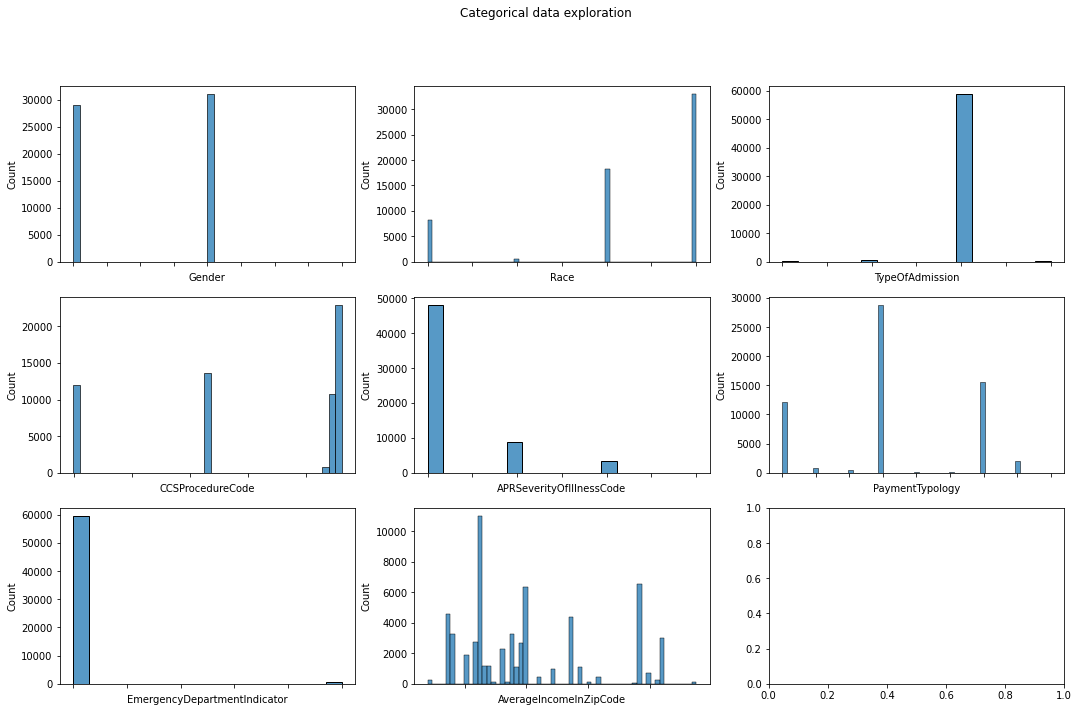

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 11))
fig.suptitle('Categorical data exploration')
ax = sns.histplot (df['Gender'],ax=axes[0][0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax= sns.histplot(df['Race'],ax=axes[0][1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax= sns.histplot(df['TypeOfAdmission'],ax=axes[0][2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

ax= sns.histplot(df['CCSProcedureCode'],ax=axes[1][0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax= sns.histplot(df['APRSeverityOfIllnessCode'],ax=axes[1][1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax= sns.histplot(df['PaymentTypology'],ax=axes[1][2])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax= sns.histplot(df['EmergencyDepartmentIndicator'],ax=axes[2][0])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax= sns.histplot(df['AverageIncomeInZipCode'],ax=axes[2][1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

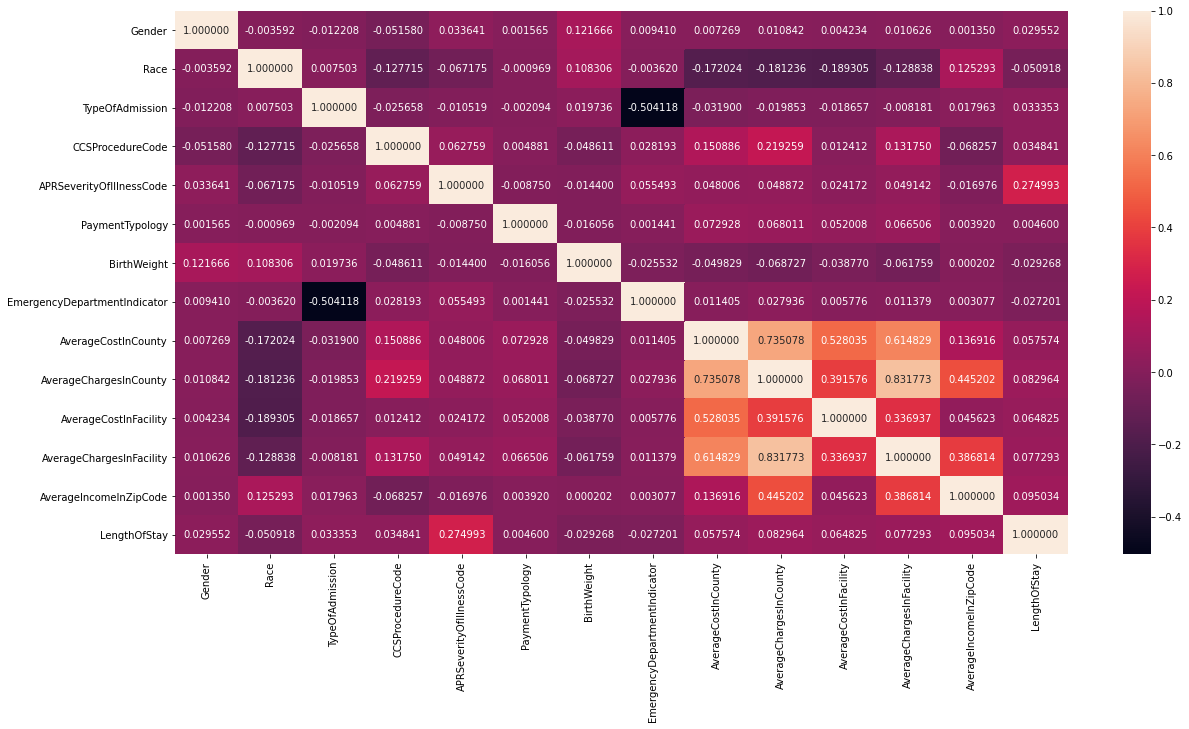

In [ ]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(),annot=True, fmt="f")

The heatmap above shown the correlation of independent variables versus the LOS. It can be depicted that APR Serverity Illness Code and the Average Income in Zip Code have established strong correlation with the LOS. Therefore, it can be understandable that the APR severity of illness code is the benchmark for the hospital to classify patients' illness status to minimize the mortality risk. Moreover, the average income in zip code can demonstrate the patients' financial status. More specifically, the health care insurance in the US is very expensive and the longer you stay in the hospital, the more medical bills you have to pay.

In the machine learning model, we will see if that particular model has classified these independent variables as the most important features for classification or not by ploting feature importance.

## Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

The numerical data columns have widely various scale, therefore, the standardization is used to remove the mean and scale each feature/variable to unit variance. This will arrange data in a standard normal distribution, in which, it transform data in such a manner that it has mean as 0 and standard deviation as 1 [4]. This is more useful when using in Classification than Regression [4].




There are two ways of standardization: StandardScaler and MinMaxScaler. In this report, StandardScaler is applied.

In [ ]:
from sklearn import preprocessing 
column_name  = ['BirthWeight','AverageCostInCounty','AverageChargesInCounty','AverageCostInFacility','AverageChargesInFacility']
def standardization(data):
  x = data.loc[:,column_name]
  data.loc[:,column_name] = preprocessing.StandardScaler().fit_transform(x) 
standardization(df)

In [ ]:
df.head(10)

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,0,2,2,228,1,3,0.815033,0,0.372323,0.387506,-0.516956,0.257181,45,0
1,1,0,2,228,1,3,-0.977721,0,1.358646,0.306457,0.754179,-0.401494,34,0
2,1,2,2,220,1,6,-0.305438,0,1.222655,1.056396,2.069367,0.353572,45,0
3,0,2,2,0,1,6,-0.081344,0,1.222655,1.056396,2.746985,2.000778,59,0
4,0,2,2,228,1,3,-1.650004,0,0.372323,0.387506,2.886353,1.654598,59,0
5,1,3,2,228,1,3,0.815033,0,0.372323,0.387506,-0.424844,-0.825151,45,0
6,0,2,2,228,1,6,0.142751,0,1.222655,1.056396,2.746985,2.000778,74,0
7,1,3,2,220,1,6,-0.977721,0,0.372323,0.387506,-0.573023,0.044705,45,0
8,1,3,2,220,1,3,-0.081344,0,-0.518651,0.601775,-0.818920,1.395740,104,0
9,1,2,1,231,2,6,-1.650004,1,1.222655,1.056396,-0.691566,1.164867,74,0


## Slicing data

Before training model, the dataset is divided into dependent and independent variables. Moreover, it should also be split into training and test data. In this report, the data is split as 70% for training and 30% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

X = df[df.columns.difference(['LengthOfStay'])] 
Y = df.loc[:,'LengthOfStay']
 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

## Slicing data for explaination

This section is create to slice the data for the explaination in each classification models with the most correlate features: "APRSeverityOfIllnessCode" and "AverageIncomeInZipCode". 

In [ ]:
X_ex = X.loc[:,['APRSeverityOfIllnessCode','AverageIncomeInZipCode']]
Y_ex = Y
X_train_ex, X_test_ex, Y_train_ex, Y_test_ex = train_test_split(X_ex, Y_ex, test_size=0.2, random_state=0)

In [ ]:
def explaination_data(Y_pred_model,predicted_model_str,predicted_model_str_round):
  data_ex = X_test_ex.copy()
  data_ex['LengtOfStay'] = Y_test_ex.copy()
  data_ex[predicted_model_str] = Y_pred_model
  data_ex[predicted_model_str_round] = Y_pred_model.round().astype(int)
  return data_ex

# Modeling 

In [ ]:
# Algorithms
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import xgboost
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import brier_score_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KernelDensity
from sklearn.metrics import balanced_accuracy_score
import itertools
from sklearn.metrics import hamming_loss
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")
!pip install catboost
from catboost import CatBoostClassifier

# Expectation

The models that are used in this report are 

1.   Logistic Regression
2.   Random Forest
3.   Decision Tree
4.   k-nearest Neighbor
5.   Naive Bayes
6.   XGBoost
7.   CatBoost

Excluding the Gradient Boosting models(XgBoost and CatBoost), of all the normal models, it is expected that Random Forest should have the largest accuracy score. In the next sections, we will use the same training/test data for the model training and use one or two metrics that are suitable for the characteristic of the dataset.

The goal of our prediction model is to predict when to discharge a patient or not in order to minimize the mortality risk.
Therefore, there are two situations that have misclassification. In which, it is when the patient is very sick and suffers from severe symptoms but our prediction model said they should be sent home and the other misclassification is when a patient has recovered very well or they do not show much symptoms or the laboratory test result did not illustrate any dangerous symptoms, however, our prediction model has confirmed that they should be stayed in the hospital for more days. Hence, the sooner situation should be prioritized than the later one. 
In order to avoid that situation, the False Negative
(Actual is 1 but Prediction is 0) should be minimized. Moreover, the False Positive should also be noticed.

The metrics that are used in this paper are:


1.   Accuracy (Range from 0 to 1, the more weight the better):

> 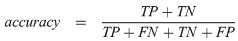

This metric basically calculates how accurate is the model.

2.   Balanced accuracy (Range from 0 to 1, the more weight the better):
This metrics is widely used in unbalanced dataset. In which, when there are 1000 labels from 2 classes with 750 observations in class 1 and 250 in class 2. If you miss-predict 10 in each class, you have an accuracy of 740/750= 98.7% in class 1 and 240/250=96% in class 2. balanced_accuracy_score would then return (98.7%+96%)/2 = 97.35%. 

3.   Precision (Range from 0 to 1, the more weight the better):
> 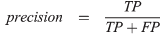
This metric will calculate how many sick patients that need more days to stay in the prediction of the model.

4.   Recall (Range from 0 to 1, the more weight the better)
> 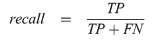
This metric will calculate how many actual sick patients that need more days to stay in the dataset based on the model.

5.   F1 Score (Range from 0 to 1, the more weight the better)
> 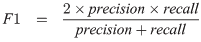
This metric will calculate the harmonic mean between the precision and recall to give out the ratio between the prediction and the actual results in the model. F1 score is widely used for unbalanced dataset.

6.   Receiver operating characteristic curve (ROC) and Area Under Curve (AUC) (Range from 0 to 1)
This metric plots the curve of the relationship between the True Positive Rate(TPR) and the False Positive Rate(FPR) at different classification thresholds. By calculating the area under the plotted curve, it would tell how well the prediction are ranked and measures the quality of the model's predictions irrespective of what classification threshold is chosen.
> 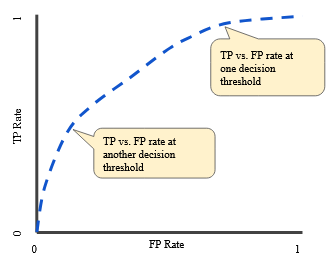

7.   Matthews Correlation Coefficient 

This metric is calculated as:
> 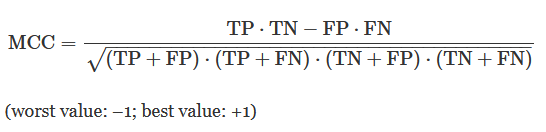

This metrics calculates the Pearson's product-moment correlation coefficient of the actual and predicted values. By using this measurement, the unbalanced dataset issue cannot be affected [5].

8.   Brier Loss Score

This metrics calculates the goodness of predicted probability score [6] and in this paper, it is used for how well the model can calibrate itself.



Next is the function which calculates the smallest sum of FP and FN model.






In [ ]:
def plot_confusion_matrix_def(conf_mat):
  with plt.style.context(('ggplot', 'seaborn')):
    fig = plt.figure(figsize=(6,6), num=1)
    plt.imshow(conf_mat, interpolation='nearest',cmap= plt.cm.Blues )
    plt.xticks([0,1],[0,1])
    plt.yticks([0,1],[0,1])
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    for i, j in itertools.product(range(conf_mat.shape[0]), range(conf_mat.shape[1])):
                plt.text(j, i,conf_mat[i, j], horizontalalignment="center",color="black")
    plt.grid(None)
    plt.title('Confusion Matrix')
    plt.colorbar();

### Logistic Regression

The logistic regression model uses the Sigmoid function and the natural logarithm function to classify. 
With the division of the numerator of 1, the results which are generated will have values close to either 0 or 1. This will contribute substantially to the binary classification. With the threshold of 0.5, if the generated values from the sigmoid function are over 0.5, it will be classified as '1' and vice versa.

> 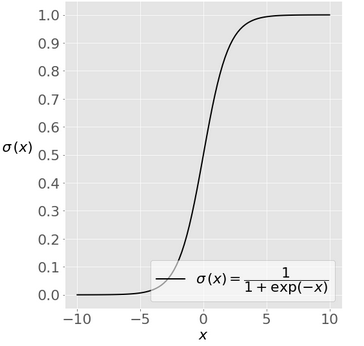



In [ ]:
logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, Y_train.values.ravel())

Y_pred_log_reg = logreg.predict_proba(X_test)[:,1]

acc_log = accuracy_score(Y_test,Y_pred_log_reg.round()) * 100

In [ ]:
balanced_acc_logreg = balanced_accuracy_score(Y_test,Y_pred_log_reg.round())

In [ ]:
conf_mat_log_reg = confusion_matrix(Y_test, Y_pred_log_reg.round())
conf_mat_log_reg

array([[14676,   249],
       [ 2712,   353]])

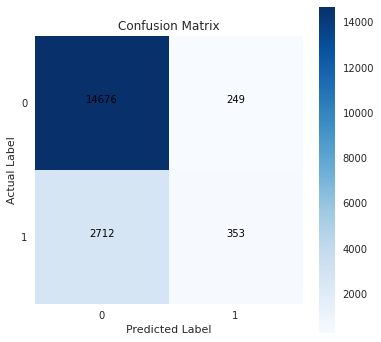

In [ ]:
plot_confusion_matrix_def(conf_mat_log_reg)

In [ ]:
# Precision & Recall
precision_log = precision_score(Y_test, Y_pred_log_reg.round())
recall_log = recall_score(Y_test, Y_pred_log_reg.round())

In [ ]:
# F Score
f1_log = f1_score(Y_test,Y_pred_log_reg.round())

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_log_reg.round()))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91     14925
           1       0.59      0.12      0.19      3065

    accuracy                           0.84     17990
   macro avg       0.72      0.55      0.55     17990
weighted avg       0.80      0.84      0.79     17990



In [ ]:
brier_log_reg = brier_score_loss(Y_test, Y_pred_log_reg, pos_label=2)

In [ ]:
mcc_log_reg = matthews_corrcoef(Y_test.values.ravel(),Y_pred_log_reg.round())

In [ ]:
roc_log_reg = roc_auc_score(Y_test, Y_pred_log_reg)

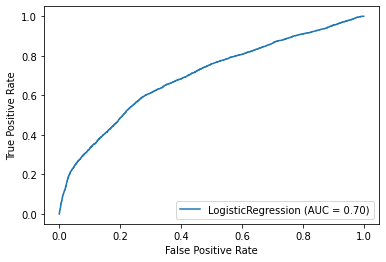

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(logreg, X_test, Y_test)  
plt.show() 

#### Explaination

In [ ]:
logreg_ex = LogisticRegression() 
logreg_ex.fit(X_train_ex, Y_train_ex.values.ravel())  
Y_pred_logreg = logreg_ex.predict_proba(X_test_ex)[:,1]
f1_score(Y_test_ex,Y_pred_logreg.round()) * 100

15.939597315436242

In [ ]:
logreg_ex_df = explaination_data(Y_pred_logreg,'Log Reg prediction','Log Reg round prediction')
logreg_ex_df.head(10)

,APRSeverityOfIllnessCode,AverageIncomeInZipCode,LengtOfStay,Log Reg prediction,Log Reg round prediction
41580,1,64,0,0.123892,0
51919,1,45,1,0.100292,0
17529,3,34,0,0.452149,0
42555,1,45,0,0.100292,0
25729,1,74,0,0.138135,0
54699,1,58,1,0.115965,0
10332,1,96,0,0.174309,0
24634,1,45,0,0.100292,0
2084,1,74,0,0.138135,0
31651,1,58,0,0.115965,0


Text(0.5, 1.0, 'Real data')

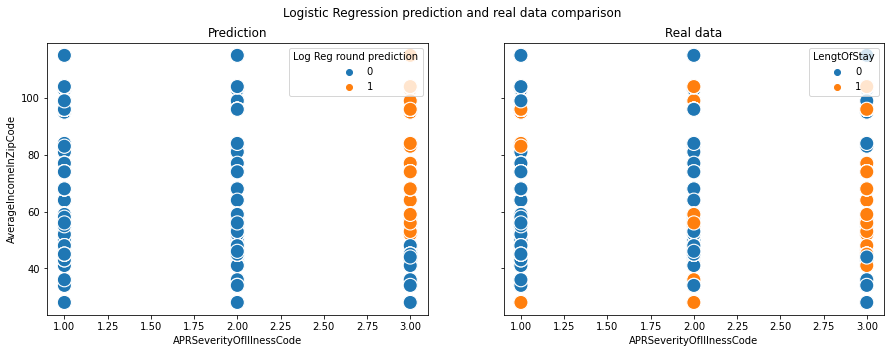

In [ ]:
fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(15, 5))
fig.suptitle('Logistic Regression prediction and real data comparison')
ax = sns.scatterplot(x="APRSeverityOfIllnessCode", y="AverageIncomeInZipCode", hue="Log Reg round prediction", data=logreg_ex_df.loc[:,['APRSeverityOfIllnessCode','AverageIncomeInZipCode','Log Reg round prediction']], s=200,ax=axes[0])
axes[0].set_title('Prediction')
ax = sns.scatterplot(x="APRSeverityOfIllnessCode", y="AverageIncomeInZipCode", hue="LengtOfStay", data=logreg_ex_df.loc[:,['APRSeverityOfIllnessCode','AverageIncomeInZipCode','LengtOfStay']], s=200,ax=axes[1])
axes[1].set_title('Real data')

As seen from the graph above, the classification is set when the data points have the 3.0 APR Severity of Illness Code and the Average Income in Zip Code is in the range of roughly 55 to above 100. However, with the real data points, there are some cases that the target are misclassified. Take a look at the below table which is the result of the 'predict_proba' function in sklearn. If the prediction score is less than 0.5, it will be rounded to 0 and if the score is over or equal to 0.5, the round function will be 1. This has created some misclassification compared to the real data point values.

In [ ]:
logreg_ex_df[(logreg_ex_df['Log Reg prediction']>= 0.45) & (logreg_ex_df['Log Reg prediction'] <= 0.5)]

,APRSeverityOfIllnessCode,AverageIncomeInZipCode,LengtOfStay,Log Reg prediction,Log Reg round prediction
17529,3,34,0,0.452149,0
52861,3,34,1,0.452149,0
53133,3,45,1,0.486439,0
51428,3,45,1,0.486439,0
59563,3,36,1,0.458359,0
...,...,...,...,...,...
36233,3,45,0,0.486439,0
50014,3,45,1,0.486439,0
18428,3,36,0,0.458359,0
17028,3,44,0,0.483312,0


The propotion of Logistic Regression prediction that is classified as '0' but the actual values are '1'

In [ ]:
logreg_ex_df[(logreg_ex_df['Log Reg prediction']>= 0.45) & (logreg_ex_df['Log Reg prediction'] <= 0.5) & (logreg_ex_df['LengtOfStay'] == 1)]

,APRSeverityOfIllnessCode,AverageIncomeInZipCode,LengtOfStay,Log Reg prediction,Log Reg round prediction
52861,3,34,1,0.452149,0
53133,3,45,1,0.486439,0
51428,3,45,1,0.486439,0
59563,3,36,1,0.458359,0
59049,3,36,1,0.458359,0
...,...,...,...,...,...
52929,3,34,1,0.452149,0
53544,3,45,1,0.486439,0
55372,3,41,1,0.473938,0
52041,3,45,1,0.486439,0


The propotion of Logistic Regression prediction that is classified as '1' but the actual values are '0'

In [ ]:
logreg_ex_df[(logreg_ex_df['Log Reg prediction']>= 0.45) & (logreg_ex_df['Log Reg prediction'] <= 0.5) & (logreg_ex_df['LengtOfStay'] == 0)]

,APRSeverityOfIllnessCode,AverageIncomeInZipCode,LengtOfStay,Log Reg prediction,Log Reg round prediction
17529,3,34,0,0.452149,0
42225,3,34,0,0.452149,0
12228,3,45,0,0.486439,0
18763,3,34,0,0.452149,0
44322,3,45,0,0.486439,0
...,...,...,...,...,...
39632,3,36,0,0.458359,0
36233,3,45,0,0.486439,0
18428,3,36,0,0.458359,0
17028,3,44,0,0.483312,0


In [ ]:
pd.DataFrame({'Accuracy': [acc_log],
              'Balanced accuracy': [balanced_acc_logreg],
              'Precision': [precision_log],
              'Recall': [recall_log],
              'F1 score':[f1_log],
              'MCC': [mcc_log_reg],
              'ROC_AUC':[roc_log_reg],
              'Brier score':[brier_log_reg]})

,Accuracy,Balanced accuracy,Precision,Recall,F1 score,MCC,ROC_AUC,Brier score
0,83.540856,0.549244,0.586379,0.115171,0.192528,0.205889,0.697109,0.041358


As the metric evaluation above has shown, the f1 score of the two correlation independent values(AverageIncomeInZipCode and APRSeverityofIllnessCode) in the explaination part above even have the almost close values compared to the f1 score in the whole model test set (16 vs 19). With the low brier score, it can be depicted that the model is relatively well-calibrated. However, the recall score is very low, while the precision is almost 60% (ratio 1:5). Therefore, the result of the low f1 score can be easily understood. Moreover, the MCC score is almost 0 suggest that the prediction is random with respects to actuals, more specifically, it does not give much information on the model. This can be explained as the heatmap above shows that there are no actual strong correlation between the independent and the dependent values. Futhermore, compared to the normal accuracy, the balanced one has a lower value than the normal one as this suggests that the dataset is imbalanced, therefore, the normal accuracy is not reliable metric for evaluation. Finally, the ROC_AUC score shows a not so bad score itself and can be a good metric for the evaluation. Overall, the above metric has interpreted and suggested that Logistic Regression is a not so bad classification model and it can be listed in the models that need some tuning.

### Random Forest

The definition of the random forest will be mentioned after observing the algorithm in the explaination part comparing with the Decision Tree results.

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, Y_train.values.ravel())

Y_pred_random_forest = random_forest.predict_proba(X_test)[:,1]

acc_random_forest = accuracy_score(Y_test,Y_pred_random_forest.round()) * 100

In [ ]:
balanced_acc_random_forest = balanced_accuracy_score(Y_test,Y_pred_random_forest.round())

In [ ]:
conf_mat_random_forest = confusion_matrix(Y_test, Y_pred_random_forest.round())
conf_mat_random_forest

array([[13835,  1090],
       [ 2289,   776]])

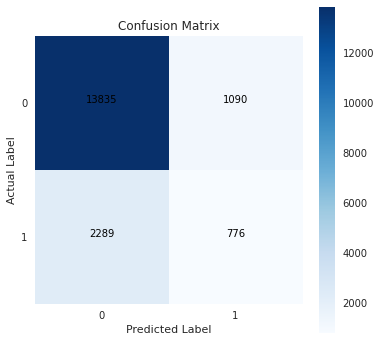

In [ ]:
plot_confusion_matrix_def(conf_mat_random_forest)

In [ ]:
# Precision & Recall
precision_random_forest = precision_score(Y_test, Y_pred_random_forest.round())
recall_random_forest = recall_score(Y_test, Y_pred_random_forest.round())

In [ ]:
# F Score
f1_random_forest = f1_score(Y_test, Y_pred_random_forest.round())

In [ ]:
brier_random_forest = brier_score_loss(Y_test, Y_pred_random_forest, pos_label=2)

In [ ]:
mcc_random_forest = matthews_corrcoef(Y_test.values.ravel(),Y_pred_random_forest.round())

In [ ]:
roc_random_forest = roc_auc_score(Y_test, Y_pred_random_forest)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_random_forest.round()))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     14925
           1       0.42      0.25      0.31      3065

    accuracy                           0.81     17990
   macro avg       0.64      0.59      0.60     17990
weighted avg       0.78      0.81      0.79     17990



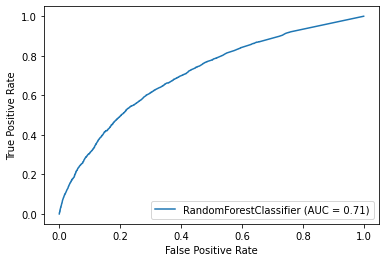

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(random_forest, X_test, Y_test)  
plt.show() 

#### Explaination

In [ ]:
random_forest_ex = RandomForestClassifier()
random_forest_ex.fit(X_train_ex, Y_train_ex.values.ravel())  
Y_pred_random_forest = random_forest_ex.predict_proba(X_test_ex)[:,1]
f1_score(Y_test_ex,Y_pred_random_forest.round()) * 100

25.141562853907136

In [ ]:
random_forest_ex_df = explaination_data(Y_pred_random_forest,'Random Forest prediction','Random Forest round prediction')
random_forest_ex_df.head(10)

,APRSeverityOfIllnessCode,AverageIncomeInZipCode,LengtOfStay,Random Forest prediction,Random Forest round prediction
41580,1,64,0,0.057945,0
51919,1,45,1,0.093113,0
17529,3,34,0,0.523771,1
42555,1,45,0,0.093113,0
25729,1,74,0,0.151914,0
54699,1,58,1,0.117704,0
10332,1,96,0,0.207236,0
24634,1,45,0,0.093113,0
2084,1,74,0,0.151914,0
31651,1,58,0,0.117704,0


Text(0.5, 1.0, 'Real data')

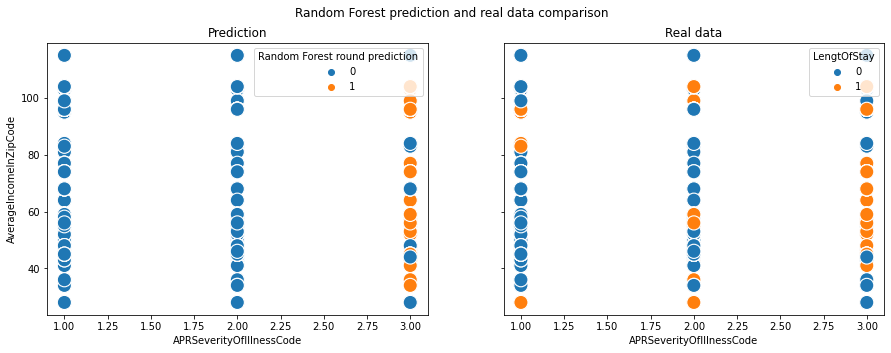

In [ ]:
fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(15, 5))
fig.suptitle('Random Forest prediction and real data comparison')
ax = sns.scatterplot(x="APRSeverityOfIllnessCode", y="AverageIncomeInZipCode", hue="Random Forest round prediction", data=random_forest_ex_df.loc[:,['APRSeverityOfIllnessCode','AverageIncomeInZipCode','Random Forest round prediction']], s=200,ax=axes[0])
axes[0].set_title('Prediction')
ax = sns.scatterplot(x="APRSeverityOfIllnessCode", y="AverageIncomeInZipCode", hue="LengtOfStay", data=random_forest_ex_df.loc[:,['APRSeverityOfIllnessCode','AverageIncomeInZipCode','LengtOfStay']], s=200,ax=axes[1])
axes[1].set_title('Real data')

As seen from the graph above, the Random Forest prediction share the same trend when predicting APR Severity of Illness Code in the code of 1 and 2. However, in the number 3 APR Severity of Illness Code, the split in data points are more details than the Logistic Regression. Let's plot the table for the round prediction. 

In [ ]:
random_forest_ex_df[(random_forest_ex_df['Random Forest prediction']>= 0.45) & (random_forest_ex_df['Random Forest prediction'] <= 0.5)]

,APRSeverityOfIllnessCode,AverageIncomeInZipCode,LengtOfStay,Random Forest prediction,Random Forest round prediction
51691,3,115,1,0.491643,0
59050,3,28,1,0.494782,0
59900,3,28,1,0.494782,0
55455,3,44,1,0.452079,0
48054,3,83,0,0.463953,0
3798,3,44,0,0.452079,0
3716,3,44,0,0.452079,0
23434,3,28,0,0.494782,0
55564,3,44,1,0.452079,0
55130,3,44,1,0.452079,0


As observed from the table above, the Logistic Regression has more cases where the prediction values are from 0.45 to 0.5 than Random Forest. For this cases, it is can be seen that when the prediction is range from 0.45 to 0.5, the actual LOS values usually are 1 than 0. Therefore, it can create less misclassification than Logistic Regression. More specifically, it can proved by the improvement in F1 score. 

In [ ]:
pd.DataFrame({'Accuracy': [acc_random_forest],
              'Balanced accuracy': [balanced_acc_random_forest],
              'Precision': [precision_random_forest],
              'Recall': [recall_random_forest],
              'F1 score':[f1_random_forest],
              'MCC': [mcc_random_forest],
              'ROC_AUC':[roc_random_forest],
              'Brier score':[brier_random_forest]})

,Accuracy,Balanced accuracy,Precision,Recall,F1 score,MCC,ROC_AUC,Brier score
0,81.217343,0.590075,0.415863,0.253181,0.314743,0.222133,0.707641,0.075289


Although the accuracy in Random Forest is lower than the  one compared to the Logistic Regression, the balanced one is higher. Moreover, while the MCC score still does not have much influence on the model, the F1 score and the ratio between the precision and recall has partly minimized the gap (5:3). Furthermore, the brier loss score has increased a little bit, however, it can be improved by hypertuning. Lastly, the ROC_AUC score show a better score than Logistic Regression.

### Decision Tree

Unlike other models, Decision Tree can be used for classification and regression. This model use the information gain or gini index, etc. to find the root node to split in order to achieve high accuracy. If the information gain is usually used as the criterion, the attribute can be categorical, while the continous data can be applied by the gini index. For the small-to-medium structured/tabular data, decision tree algorithms are considered best-in-class [7].



In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train.values.ravel())
Y_pred_decision_tree = decision_tree.predict_proba(X_test)[:,1]
acc_decision_tree = accuracy_score(Y_test,Y_pred_decision_tree.round()) * 100

In [ ]:
balanced_acc_decision_tree = balanced_accuracy_score(Y_test,Y_pred_decision_tree.round())

In [ ]:
conf_mat_decision_tree = confusion_matrix(Y_test, Y_pred_decision_tree.round())
conf_mat_decision_tree

array([[13179,  1746],
       [ 2158,   907]])

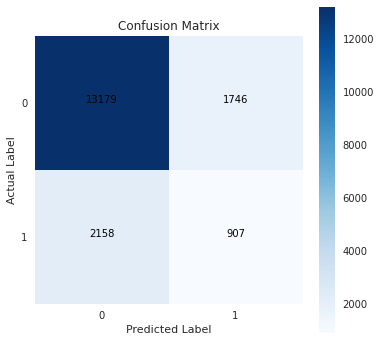

In [ ]:
plot_confusion_matrix_def(conf_mat_decision_tree)

In [ ]:
# Precision & Recall
precision_decision_tree = precision_score(Y_test, Y_pred_decision_tree.round())
recall_decision_tree = recall_score(Y_test, Y_pred_decision_tree.round())

In [ ]:
# F Score
f1_decision_tree = f1_score(Y_test, Y_pred_decision_tree.round())

In [ ]:
brier_decision_tree = brier_score_loss(Y_test, Y_pred_decision_tree, pos_label=2)

In [ ]:
mcc_decision_tree = matthews_corrcoef(Y_test.values.ravel(),Y_pred_decision_tree.round())

In [ ]:
roc_decision_tree = roc_auc_score(Y_test, Y_pred_decision_tree)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_decision_tree.round()))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     14925
           1       0.34      0.30      0.32      3065

    accuracy                           0.78     17990
   macro avg       0.60      0.59      0.59     17990
weighted avg       0.77      0.78      0.78     17990



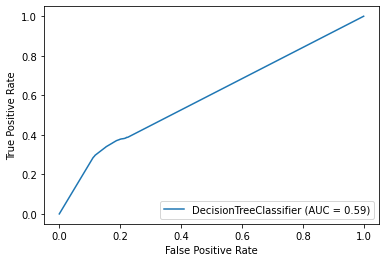

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(decision_tree, X_test, Y_test)  
plt.show() 

#### Explaination

In [ ]:
decision_tree_ex = DecisionTreeClassifier()
decision_tree_ex.fit(X_train_ex, Y_train_ex.values.ravel())  
Y_pred_decision_tree = decision_tree_ex.predict_proba(X_test_ex)[:,1]
f1_score(Y_test_ex,Y_pred_decision_tree.round()) * 100

24.829674489023468

In [ ]:
decision_tree_ex_df = explaination_data(Y_pred_decision_tree,'Decision Tree prediction','Decision Tree round prediction')
decision_tree_ex_df.head(10)

,APRSeverityOfIllnessCode,AverageIncomeInZipCode,LengtOfStay,Decision Tree prediction,Decision Tree round prediction
41580,1,64,0,0.058282,0
51919,1,45,1,0.093144,0
17529,3,34,0,0.520588,1
42555,1,45,0,0.093144,0
25729,1,74,0,0.151908,0
54699,1,58,1,0.116494,0
10332,1,96,0,0.206750,0
24634,1,45,0,0.093144,0
2084,1,74,0,0.151908,0
31651,1,58,0,0.116494,0


Text(0.5, 1.0, 'Real data')

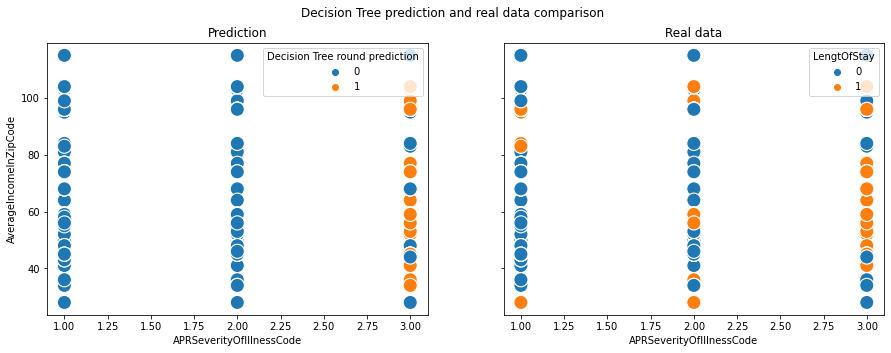

In [ ]:
fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(15, 5))
fig.suptitle('Decision Tree prediction and real data comparison')
ax = sns.scatterplot(x="APRSeverityOfIllnessCode", y="AverageIncomeInZipCode", hue="Decision Tree round prediction", data=decision_tree_ex_df.loc[:,['APRSeverityOfIllnessCode','AverageIncomeInZipCode','Decision Tree round prediction']], s=200,ax=axes[0])
axes[0].set_title('Prediction')
ax = sns.scatterplot(x="APRSeverityOfIllnessCode", y="AverageIncomeInZipCode", hue="LengtOfStay", data=decision_tree_ex_df.loc[:,['APRSeverityOfIllnessCode','AverageIncomeInZipCode','LengtOfStay']], s=200,ax=axes[1])
axes[1].set_title('Real data')

In this Decision Tree, the '1' and '2' APR Severity of Illness Code are still not classified, however, the data points in prediction is better classified and has a slightly higher F1 score compared to Random Forest.

In [ ]:
decision_tree_ex_df[(decision_tree_ex_df['Decision Tree prediction']>= 0.45) & (decision_tree_ex_df['Decision Tree prediction'] <= 0.5)]

,APRSeverityOfIllnessCode,AverageIncomeInZipCode,LengtOfStay,Decision Tree prediction,Decision Tree round prediction
54880,3,48,1,0.457143,0
55723,3,46,1,0.500000,0
51691,3,115,1,0.500000,0
58907,3,48,1,0.457143,0
59050,3,28,1,0.500000,0
55727,3,46,1,0.500000,0
59900,3,28,1,0.500000,0
55724,3,46,1,0.500000,0
49628,3,48,0,0.457143,0
49464,3,48,0,0.457143,0


The propotion of 0.45 to 0.5 prediction values in Decision Tree before rounding is obviously worse than Random Forest as the Random Forest used bagging and feature randomness when building individual tree to create an uncorrelated forest of trees with the most accurate prediction than that of any individual tree. 

In [ ]:
pd.DataFrame({'Accuracy': [acc_decision_tree],
              'Balanced accuracy': [balanced_acc_decision_tree],
              'Precision': [precision_decision_tree],
              'Recall': [recall_decision_tree],
              'F1 score':[f1_decision_tree],
              'MCC': [mcc_decision_tree],
              'ROC_AUC':[roc_decision_tree],
              'Brier score':[brier_decision_tree]})

,Accuracy,Balanced accuracy,Precision,Recall,F1 score,MCC,ROC_AUC,Brier score
0,78.299055,0.589468,0.341877,0.295922,0.317244,0.189729,0.593149,0.156154


As the above table might have suggested, the Decision Tree accuracy as well as the balanced one is understandably lower than the Random Forest's accuracy. However, the F1 score does not make much differences and the propotion of the precision and recall are the trade off between these two models. Once again, the MCC does not tell much information on the model and it is even lower than the Random Forest. Moreover, the brier loss score increases more than the RF and more interestingly, ROC_AUC is the worst comparing to the other models. This will be explained more in the Confusion Matrix summary.

### k-NN

k-nearest neighbors algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set. 

More specifically, it calculates data points distance using Euclidean formula (or Mahattan or Hamming distance but Euclidean gains more popularity) then sorting them in ascending order. Next it will choose the top 'k' labels from the sorted array, in the default sklearn documentation, 'k' is 5. With the classification, it will return the mode of the 'k' labels. 

In [ ]:
knn = KNeighborsClassifier() 
knn.fit(X_train, Y_train.values.ravel())  
Y_pred_knn = knn.predict_proba(X_test)[:,1]
acc_knn = accuracy_score(Y_test,Y_pred_knn.round()) * 100

In [ ]:
balanced_acc_knn = balanced_accuracy_score(Y_test,Y_pred_knn.round())

In [ ]:
conf_mat_knn = confusion_matrix(Y_test, Y_pred_knn.round())
conf_mat_knn

array([[14259,   666],
       [ 2518,   547]])

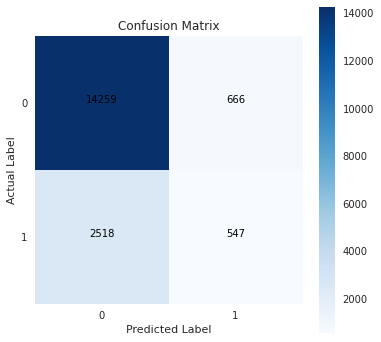

In [ ]:
plot_confusion_matrix_def(conf_mat_knn)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_knn.round()))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     14925
           1       0.45      0.18      0.26      3065

    accuracy                           0.82     17990
   macro avg       0.65      0.57      0.58     17990
weighted avg       0.78      0.82      0.79     17990



In [ ]:
# Precision & Recall
precision_knn = precision_score(Y_test, Y_pred_knn.round())
recall_knn = recall_score(Y_test, Y_pred_knn.round())

In [ ]:
# F Score
f1_knn = f1_score(Y_test, Y_pred_knn.round())

In [ ]:
brier_knn = brier_score_loss(Y_test, Y_pred_knn, pos_label=2)

In [ ]:
mcc_knn = matthews_corrcoef(Y_test.values.ravel(),Y_pred_knn.round())

In [ ]:
roc_knn = roc_auc_score(Y_test, Y_pred_knn)

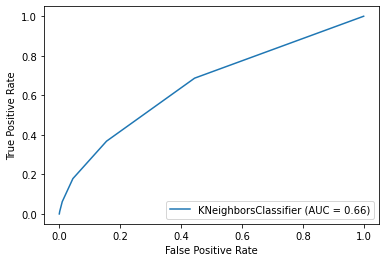

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(knn, X_test, Y_test)  
plt.show() 

As shown above, this algorithm did not behave well with 'k' = 5. Moreover, as presented above, the numerous data has a repeating trend and not follow any normal distribution rule. Therefore, as mentioned above, the classification would find the "mode" of the rows in the 5 sorted ascending datapoints, it would create huge misclassification. However, algorithm does not influenced in any way by the size of the class, it will not favor any on the basis of size. With the different k number, the algorithm will behave differently and try to fit with the outliers very well [8].



#### Explaination

In [ ]:
knn_ex = KNeighborsClassifier() 
knn_ex.fit(X_train_ex, Y_train_ex.values.ravel())  
Y_pred_knn = knn_ex.predict_proba(X_test_ex)[:,1]
f1_score(Y_test_ex,Y_pred_knn.round()) * 100

27.21428571428571

In [ ]:
knn_ex_df = explaination_data(Y_pred_knn,'kNN prediction','kNN round prediction')
knn_ex_df.head(10)

,APRSeverityOfIllnessCode,AverageIncomeInZipCode,LengtOfStay,kNN prediction,kNN round prediction
41580,1,64,0,0.0,0
51919,1,45,1,0.0,0
17529,3,34,0,0.8,1
42555,1,45,0,0.0,0
25729,1,74,0,0.0,0
54699,1,58,1,0.2,0
10332,1,96,0,0.2,0
24634,1,45,0,0.0,0
2084,1,74,0,0.0,0
31651,1,58,0,0.2,0


Text(0.5, 1.0, 'Real data')

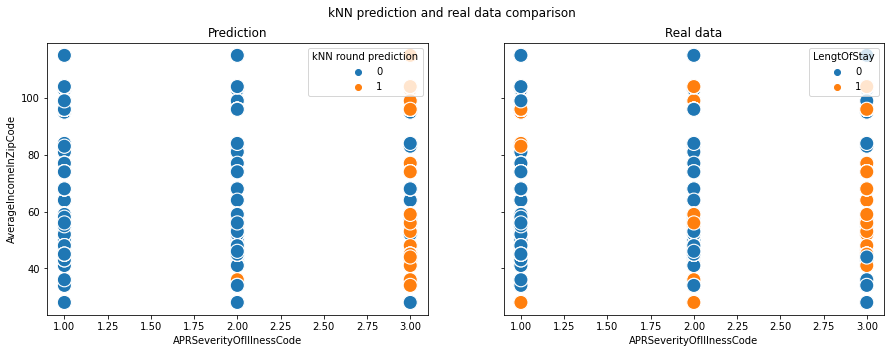

In [ ]:
fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(15, 5))
fig.suptitle('kNN prediction and real data comparison')
ax = sns.scatterplot(x="APRSeverityOfIllnessCode", y="AverageIncomeInZipCode", hue="kNN round prediction", data=knn_ex_df.loc[:,['APRSeverityOfIllnessCode','AverageIncomeInZipCode','kNN round prediction']], s=200,ax=axes[0])
axes[0].set_title('Prediction')
ax = sns.scatterplot(x="APRSeverityOfIllnessCode", y="AverageIncomeInZipCode", hue="LengtOfStay", data=knn_ex_df.loc[:,['APRSeverityOfIllnessCode','AverageIncomeInZipCode','LengtOfStay']], s=200,ax=axes[1])
axes[1].set_title('Real data')

As seen from the graph above, the prediction is starting classified other APR Severity of Illness Code beside the '3'. 

In [ ]:
knn_ex_df[(knn_ex_df['kNN prediction']>= 0.45) & (knn_ex_df['kNN prediction'] <= 0.5)]

,APRSeverityOfIllnessCode,AverageIncomeInZipCode,LengtOfStay,kNN prediction,kNN round prediction


Suprisingly, the knn prediction does not have any values from 0.45 to 0.5.

In [ ]:
pd.DataFrame({'Accuracy': [acc_knn],
              'Balanced accuracy': [balanced_acc_knn],
              'Precision': [precision_knn],
              'Recall': [recall_knn],
              'F1 score':[f1_knn],
              'MCC': [mcc_knn],
              'ROC_AUC':[roc_knn],
              'Brier score':[brier_knn]})

,Accuracy,Balanced accuracy,Precision,Recall,F1 score,MCC,ROC_AUC,Brier score
0,82.301278,0.566922,0.450948,0.178467,0.255727,0.20067,0.655786,0.062312


The MCC continues to be the unreliable evaluation metric which does not tell much information about the model. However, the F1 score in the explaination part is even higher than the whole kNN model which suggests that with the big dataset, the k should be considered and tuned well. While the brier loss score is low, the ROC_AUC score is just higher than the decsion tree a little. Moreover, the ratio between the precision and recall is (5:2), which is not really bad.

### Naive Bayes

Naive Bayes model use probailistic algorithm that are used in a wide variety of classification tasks. The word 'Naive' deveries from the assumption of all the features that go into the model is independent to each other. Therefore, if one feature value is changed, it does not directly influence or change the value of any of other features used in the algorithm.


> 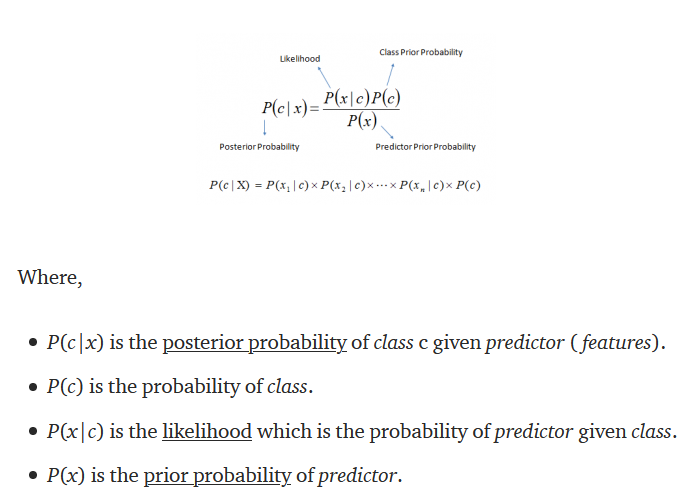



In [ ]:
gnb = GaussianNB()
Y_pred_gnb = gnb.fit(X_train, Y_train).predict_proba(X_test)[:,1]
acc_gnb = accuracy_score(Y_test,Y_pred_gnb.round()) * 100

In [ ]:
balanced_acc_gnb = balanced_accuracy_score(Y_test,Y_pred_gnb.round())

In [ ]:
conf_mat_gnb = confusion_matrix(Y_test, Y_pred_gnb.round())
conf_mat_gnb

array([[12484,  2441],
       [ 1798,  1267]])

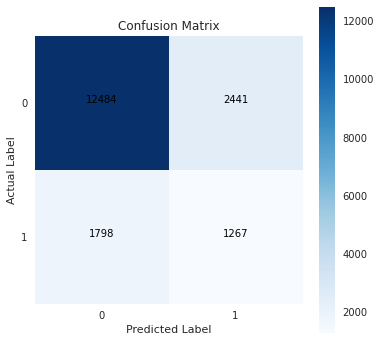

In [ ]:
plot_confusion_matrix_def(conf_mat_gnb)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_gnb.round()))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85     14925
           1       0.34      0.41      0.37      3065

    accuracy                           0.76     17990
   macro avg       0.61      0.62      0.61     17990
weighted avg       0.78      0.76      0.77     17990



In [ ]:
# Precision & Recall
precision_gnb = precision_score(Y_test, Y_pred_gnb.round())
recall_gnb = recall_score(Y_test, Y_pred_gnb.round())

In [ ]:
# F Score
f1_gnb= f1_score(Y_test, Y_pred_gnb.round())

In [ ]:
brier_naive_bayes = brier_score_loss(Y_test, Y_pred_gnb, pos_label=2)

In [ ]:
mcc_naive_bayes = matthews_corrcoef(Y_test.values.ravel(),Y_pred_gnb.round())

In [ ]:
roc_gnb = roc_auc_score(Y_test, Y_pred_gnb)

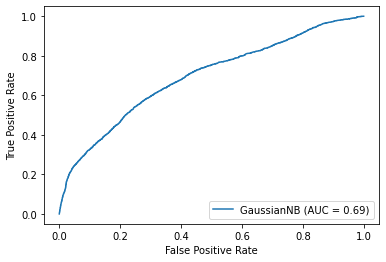

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(gnb, X_test, Y_test)  
plt.show() 

#### Explaination

In [ ]:
gnb_ex = GaussianNB()
gnb_ex.fit(X_train_ex, Y_train_ex.values.ravel())  
Y_pred_gnb = gnb_ex.predict_proba(X_test_ex)[:,1]
f1_score(Y_test_ex,Y_pred_gnb.round()) * 100

28.091493924231592

In [ ]:
gnb_ex_df = explaination_data(Y_pred_gnb,'Gaussian Naive Bayes prediction','Gaussian Naive Bayes round prediction')
gnb_ex_df.head(10)

,APRSeverityOfIllnessCode,AverageIncomeInZipCode,LengtOfStay,Gaussian Naive Bayes prediction,Gaussian Naive Bayes round prediction
41580,1,64,0,0.080771,0
51919,1,45,1,0.070690,0
17529,3,34,0,0.978532,1
42555,1,45,0,0.070690,0
25729,1,74,0,0.092373,0
54699,1,58,1,0.076100,0
10332,1,96,0,0.143142,0
24634,1,45,0,0.070690,0
2084,1,74,0,0.092373,0
31651,1,58,0,0.076100,0


Text(0.5, 1.0, 'Real data')

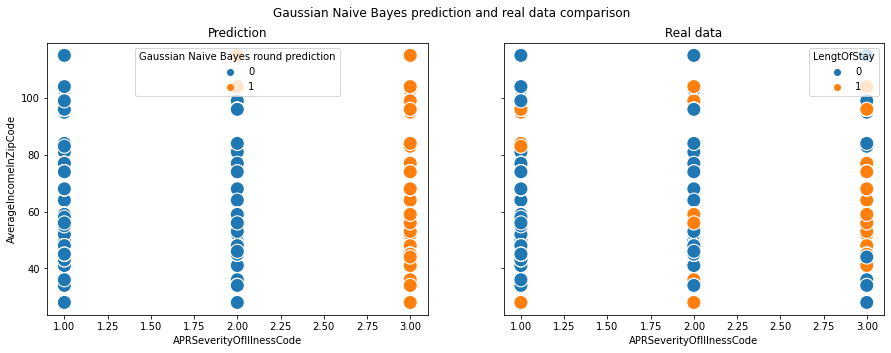

In [ ]:
fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(15, 5))
fig.suptitle('Gaussian Naive Bayes prediction and real data comparison')
ax = sns.scatterplot(x="APRSeverityOfIllnessCode", y="AverageIncomeInZipCode", hue="Gaussian Naive Bayes round prediction", data=gnb_ex_df.loc[:,['APRSeverityOfIllnessCode','AverageIncomeInZipCode','Gaussian Naive Bayes round prediction']], s=200,ax=axes[0])
axes[0].set_title('Prediction')
ax = sns.scatterplot(x="APRSeverityOfIllnessCode", y="AverageIncomeInZipCode", hue="LengtOfStay", data=gnb_ex_df.loc[:,['APRSeverityOfIllnessCode','AverageIncomeInZipCode','LengtOfStay']], s=200,ax=axes[1])
axes[1].set_title('Real data')

Although there are some improvement in the prediction in the '2' APR Severity of Illness code, the algorithm suggests some 'naive' assumption on the probability in the '3' column with target 1. This will dramatically make a huge misclassification in the model.

In [ ]:
gnb_ex_df[(gnb_ex_df['Gaussian Naive Bayes prediction']>= 0.45) & (gnb_ex_df['Gaussian Naive Bayes prediction'] <= 0.5)]

,APRSeverityOfIllnessCode,AverageIncomeInZipCode,LengtOfStay,Gaussian Naive Bayes prediction,Gaussian Naive Bayes round prediction
55902,2,96,1,0.462605,0
16950,2,96,0,0.462605,0
58578,2,96,1,0.462605,0
38363,2,96,0,0.462605,0
19051,2,96,0,0.462605,0
...,...,...,...,...,...
49354,2,96,0,0.462605,0
38136,2,96,0,0.462605,0
55935,2,96,1,0.462605,0
58332,2,96,1,0.462605,0


In [ ]:
gnb_ex_df[(gnb_ex_df['Gaussian Naive Bayes prediction']>= 0.45) & (gnb_ex_df['Gaussian Naive Bayes prediction'] <= 0.5) & (gnb_ex_df['LengtOfStay'] == 1)]

,APRSeverityOfIllnessCode,AverageIncomeInZipCode,LengtOfStay,Gaussian Naive Bayes prediction,Gaussian Naive Bayes round prediction
55902,2,96,1,0.462605,0
58578,2,96,1,0.462605,0
58700,2,96,1,0.462605,0
58239,2,96,1,0.462605,0
58135,2,96,1,0.462605,0
...,...,...,...,...,...
58276,2,96,1,0.462605,0
57899,2,96,1,0.462605,0
55787,2,96,1,0.462605,0
55935,2,96,1,0.462605,0


In [ ]:
gnb_ex_df[(gnb_ex_df['Gaussian Naive Bayes prediction']>= 0.45) & (gnb_ex_df['Gaussian Naive Bayes prediction'] <= 0.5) & (gnb_ex_df['LengtOfStay'] == 0)]

,APRSeverityOfIllnessCode,AverageIncomeInZipCode,LengtOfStay,Gaussian Naive Bayes prediction,Gaussian Naive Bayes round prediction
16950,2,96,0,0.462605,0
38363,2,96,0,0.462605,0
19051,2,96,0,0.462605,0
20485,2,96,0,0.462605,0
22525,2,96,0,0.462605,0
...,...,...,...,...,...
16678,2,96,0,0.462605,0
38715,2,96,0,0.462605,0
49354,2,96,0,0.462605,0
38136,2,96,0,0.462605,0


However, compared to the Logistic Regression, the propotion of misclassification and the F1 score imply that it is better than the LR. Although the numerical data points are not normally distributed, since our dataset has a lot of the categorical data and this paper [9] also shows that Naive Bayes algorithm works better on the categorical than numerical data and even performs better than Logistic Regression as shown in the explaination above.



In [ ]:
pd.DataFrame({'Accuracy': [acc_gnb],
              'Balanced accuracy': [balanced_acc_gnb],
              'Precision': [precision_gnb],
              'Recall': [recall_gnb],
              'F1 score':[f1_gnb],
              'MCC': [mcc_naive_bayes],
              'ROC_AUC':[roc_gnb],
              'Brier score':[brier_naive_bayes]})

,Accuracy,Balanced accuracy,Precision,Recall,F1 score,MCC,ROC_AUC,Brier score
0,76.436909,0.624913,0.341694,0.413377,0.374133,0.232191,0.693462,0.171379


As observed in the table above, interestingly the recall score surpass the precision and has the highest F1 score as well as the balanced accuracy than the above models. Although the ROC_AUC is not a bad score, the brier loss score suggests otherwise and it is even higher than the Decision Tree. Similarly to the other model, the MCC score does not give much information on the model, however, it is a slightly higher than other models.

## Advanced models

XgBoost model or CatBoost, more specifically, Extreme Gradient Boosting or Categorical Boosting have been widely used in any Kaggle competition. Both models use a gradient boosting framework. But what is Gradient Boosting?

Let's start at Boosting. Boosting is a method of converting weak learners into strong learners [10]. It is mentioned in this blog that weak learners are slightly better than random guessing.  More specifically, a set of weak learners is combined and better improved prediction accuracy can be achieved. The outcome model relies on the weight score which the outcomes of the correct prediction are the lower weight, while the misclassification prediction has the higher weight.
By using the high weight data points with the gradients in loss function (*y=ax+b+e*, e needs a special mention as it is the error term), this loss function can measure and indicate how good are model's coefficients are at fitting the underlying data [10]. It is based on the conclusions(loss function) about the various feature importance and parameters to build weak model, then with this conclusion about this model, the new and stronger model is built which also capitalize on the misclassification error of the previous model and try to reduce it. Hence, that explains the word "Gradient Boosting" is all about. 





### XGboost

So what is XgBoost? 


It is short for Extreme Gradient Boosting which uses decision tree ensemble with Gradient Boosting framework. Here is a picture from a blog about the evolution of tree-based algorithms.


> 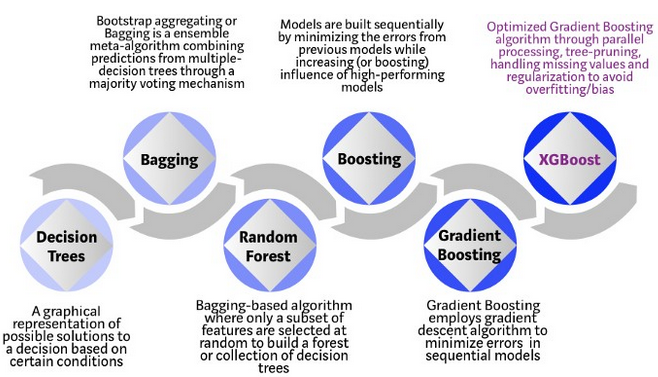 
[11]

In [ ]:
xg = XGBClassifier()
xg.fit(X_train, Y_train)
# make predictions for test data
Y_pred_xg = xg.predict_proba(X_test)[:,1]
# # evaluate predictions
acc_xgBoost = accuracy_score(Y_test, Y_pred_xg.round()) * 100.0

In [ ]:
balanced_acc_xg = balanced_accuracy_score(Y_test,Y_pred_xg.round())

In [ ]:
conf_mat_xg = confusion_matrix(Y_test, Y_pred_xg.round())
conf_mat_xg

array([[14682,   243],
       [ 2629,   436]])

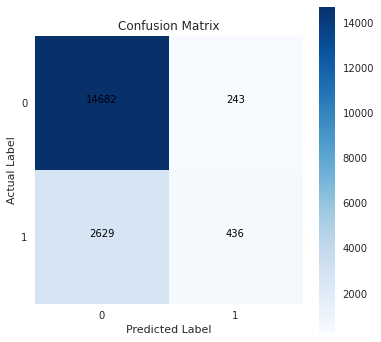

In [ ]:
plot_confusion_matrix_def(conf_mat_xg)

In [ ]:
# Precision & Recall
precision_xgBoost = precision_score(Y_test, Y_pred_xg.round())
recall_xgBoost = recall_score(Y_test, Y_pred_xg.round())

In [ ]:
# F Score
f1_xgBoost= f1_score(Y_test, Y_pred_xg.round())

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_xg.round()))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91     14925
           1       0.64      0.14      0.23      3065

    accuracy                           0.84     17990
   macro avg       0.75      0.56      0.57     17990
weighted avg       0.81      0.84      0.80     17990



In [ ]:
brier_xgboost = brier_score_loss(Y_test, Y_pred_xg, pos_label=2)

In [ ]:
mcc_xgboost = matthews_corrcoef(Y_test.values.ravel(),Y_pred_xg.round())

In [ ]:
roc_xg = roc_auc_score(Y_test, Y_pred_xg)

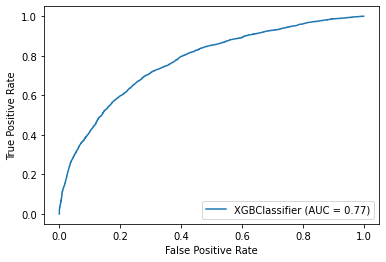

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(xg, X_test, Y_test)  
plt.show() 

#### Explaination

In [ ]:
xg_ex = XGBClassifier()
xg_ex.fit(X_train_ex, Y_train_ex.values.ravel())  
Y_pred_xg = xg_ex.predict_proba(X_test_ex)[:,1]
f1_score(Y_test_ex,Y_pred_xg.round()) * 100

25.48872180451128

In [ ]:
xg_ex_df = explaination_data(Y_pred_xg,'XgBoost prediction','XgBoost round prediction')
xg_ex_df.head(10)

,APRSeverityOfIllnessCode,AverageIncomeInZipCode,LengtOfStay,XgBoost prediction,XgBoost round prediction
41580,1,64,0,0.083260,0
51919,1,45,1,0.092041,0
17529,3,34,0,0.523546,1
42555,1,45,0,0.092041,0
25729,1,74,0,0.152222,0
54699,1,58,1,0.113056,0
10332,1,96,0,0.204647,0
24634,1,45,0,0.092041,0
2084,1,74,0,0.152222,0
31651,1,58,0,0.113056,0


Text(0.5, 1.0, 'Real data')

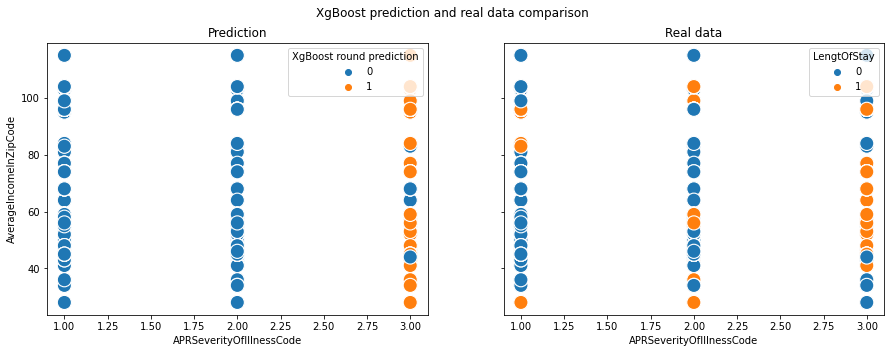

In [ ]:
fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(15, 5))
fig.suptitle('XgBoost prediction and real data comparison')
ax = sns.scatterplot(x="APRSeverityOfIllnessCode", y="AverageIncomeInZipCode", hue="XgBoost round prediction", data=xg_ex_df.loc[:,['APRSeverityOfIllnessCode','AverageIncomeInZipCode','XgBoost round prediction']], s=200,ax=axes[0])
axes[0].set_title('Prediction')
ax = sns.scatterplot(x="APRSeverityOfIllnessCode", y="AverageIncomeInZipCode", hue="LengtOfStay", data=xg_ex_df.loc[:,['APRSeverityOfIllnessCode','AverageIncomeInZipCode','LengtOfStay']], s=200,ax=axes[1])
axes[1].set_title('Real data')

As observed in the graph above, it is expected to see the improvement in the classification of other APR Severity of Illness Code because it uses the Boosting technique, however, it does not show anything on the other values. Interestingly, the F1 score is not so bad compared to other models.

In [ ]:
xg_ex_df[(xg_ex_df['XgBoost prediction']>= 0.45) & (xg_ex_df['XgBoost prediction'] <= 0.5)]

,APRSeverityOfIllnessCode,AverageIncomeInZipCode,LengtOfStay,XgBoost prediction,XgBoost round prediction
55723,3,46,1,0.494195,0
55727,3,46,1,0.494195,0
55724,3,46,1,0.494195,0
48054,3,83,0,0.452414,0
41519,3,46,0,0.494195,0
55715,3,46,1,0.494195,0


Since the XgBoost is the next step model of the Random Forest as mentioned above, it is reasonable to compare with the RF with the table above. It can be observed that the misclassification of the 'predict_proba' does influence the XgBoost itself, however, the propotion is not too much.

In [ ]:
pd.DataFrame({'Accuracy': [acc_xgBoost],
              'Balanced accuracy': [balanced_acc_xg],
              'Precision': [precision_xgBoost],
              'Recall': [recall_xgBoost],
              'F1 score':[f1_xgBoost],
              'MCC': [mcc_xgboost],
              'ROC_AUC':[roc_xg],
              'Brier score':[brier_xgboost]})

,Accuracy,Balanced accuracy,Precision,Recall,F1 score,MCC,ROC_AUC,Brier score
0,84.035575,0.562985,0.642121,0.142251,0.232906,0.248509,0.772609,0.045747


The result of the evaluation metrics is quite surprising. Beside the fact that the MCC score does not tell much information on the model, the ROC_AUC score is higher than the above models. However, the F1 score is low suggests that the dataset is unbalanced and the ratio between the precision vs recall also follow the same trend. The most interesting thing in this model is that the balanced accuracy is thought to be higher than the random forest itself, however, it is a trade off between the precision and recall when using the boosting technique. Lastly, the brier loss score is quite low which indicates that it is a well-calibrated model.

### Catboost

CatBoost or more specifically, Categorical Boosting which handles well with categorical data by using Gradient Boosting framework. With relatively fewer data, the result of this model can be outstanding unlike other models that only perform well with extensive data. The difference between CatBoost and XgBoost in data splits is that CatBoost uses a new technique called Minimal Variance Sampling(MVS) which is a weighted sampling version of Stochastic Gradient Boosting. The weighted sampling in this technique happens in the tree-level and not in the split-level. Thanks to this characteristic of this technique, it will maximize the accuracy of split scoring based on the sample observations for each boosting tree. For the XgBoost, the model does not use any weighted sampling techniques, therefore, the spliting process can be slower to CatBoost. Moreover, while XgBoost uses the specified max_depth hyperparameter, CatBoost model would grow a balanced tree itself.

In [ ]:
cat = CatBoostClassifier(verbose=False,eval_metric='AUC')

cat.fit(X_train, Y_train)

print('CatBoost model is fitted: ' + str(cat.is_fitted()))
print('CatBoost model parameters:')
print(cat.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'verbose': False, 'eval_metric': 'AUC'}


In [ ]:
Y_pred_cat = cat.predict_proba(X_test)[:,1]
acc_cat = accuracy_score(Y_test, Y_pred_cat.round()) * 100.0

In [ ]:
balanced_acc_cat = balanced_accuracy_score(Y_test,Y_pred_cat.round())

In [ ]:
conf_mat_cat = confusion_matrix(Y_test, Y_pred_cat.round())
conf_mat_cat

array([[14525,   400],
       [ 2454,   611]])

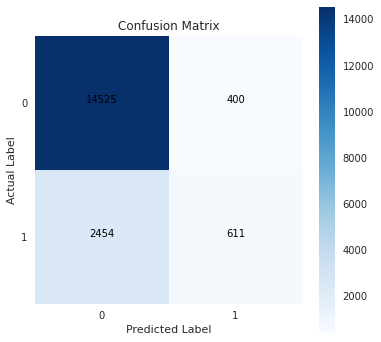

In [ ]:
plot_confusion_matrix_def(conf_mat_cat)

In [ ]:
# Precision & Recall
precision_cat = precision_score(Y_test, Y_pred_cat.round())
recall_cat = recall_score(Y_test, Y_pred_cat.round())

In [ ]:
# F Score
f1_cat= f1_score(Y_test, Y_pred_cat.round())

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_cat.round()))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     14925
           1       0.60      0.20      0.30      3065

    accuracy                           0.84     17990
   macro avg       0.73      0.59      0.61     17990
weighted avg       0.81      0.84      0.81     17990



In [ ]:
brier_cat = brier_score_loss(Y_test, Y_pred_cat, pos_label=2)

In [ ]:
mcc_cat = matthews_corrcoef(Y_test.values.ravel(),Y_pred_cat.round())

In [ ]:
roc_cat = roc_auc_score(Y_test, Y_pred_cat)

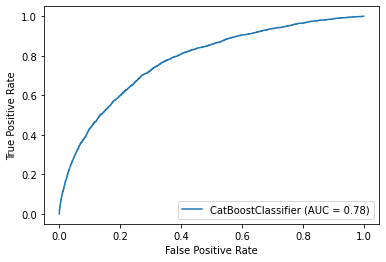

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(cat, X_test, Y_test)  
plt.show() 

#### Explaination

In [ ]:
cat_ex = CatBoostClassifier(verbose=False)
cat_ex.fit(X_train_ex, Y_train_ex.values.ravel())  
Y_pred_cat = cat_ex.predict_proba(X_test_ex)[:,1]
f1_score(Y_test_ex,Y_pred_cat.round()) * 100

25.066062665156664

In [ ]:
cat_ex_df = explaination_data(Y_pred_cat,'CatBoost prediction','CatBoost round prediction')
cat_ex_df.head(10)

,APRSeverityOfIllnessCode,AverageIncomeInZipCode,LengtOfStay,CatBoost prediction,CatBoost round prediction
41580,1,64,0,0.059428,0
51919,1,45,1,0.093138,0
17529,3,34,0,0.520024,1
42555,1,45,0,0.093138,0
25729,1,74,0,0.151853,0
54699,1,58,1,0.116587,0
10332,1,96,0,0.206827,0
24634,1,45,0,0.093138,0
2084,1,74,0,0.151853,0
31651,1,58,0,0.116587,0


Text(0.5, 1.0, 'Real data')

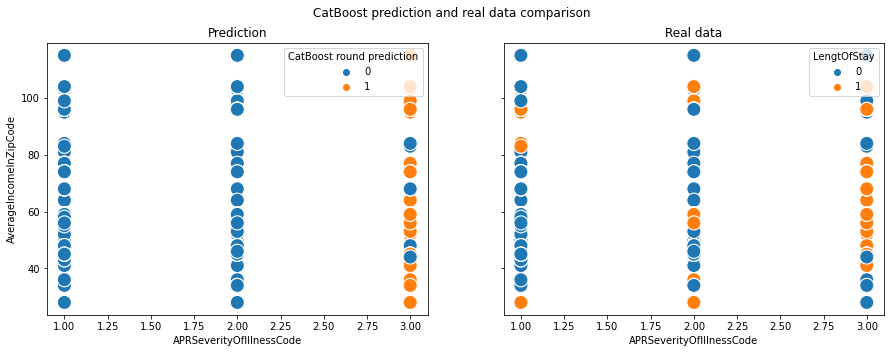

In [ ]:
fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(15, 5))
fig.suptitle('CatBoost prediction and real data comparison')
ax = sns.scatterplot(x="APRSeverityOfIllnessCode", y="AverageIncomeInZipCode", hue="CatBoost round prediction", data=cat_ex_df.loc[:,['APRSeverityOfIllnessCode','AverageIncomeInZipCode','CatBoost round prediction']], s=200,ax=axes[0])
axes[0].set_title('Prediction')
ax = sns.scatterplot(x="APRSeverityOfIllnessCode", y="AverageIncomeInZipCode", hue="LengtOfStay", data=cat_ex_df.loc[:,['APRSeverityOfIllnessCode','AverageIncomeInZipCode','LengtOfStay']], s=200,ax=axes[1])
axes[1].set_title('Real data')

The graph above shows the comparation between the CatBoost prediction versus the real data points with the two most correlating features in the dataset. Interestingly, it is expected that the CatBoost should have more classification in the other two columns in the APR Severity of Illness Code, however, it did not. Moreover, the classification on the '3' column at some points are well-split than the XgBoost.

In [ ]:
cat_ex_df[(cat_ex_df['CatBoost prediction']>= 0.45) & (cat_ex_df['CatBoost prediction'] <= 0.5)]

,APRSeverityOfIllnessCode,AverageIncomeInZipCode,LengtOfStay,CatBoost prediction,CatBoost round prediction
54880,3,48,1,0.461596,0
55723,3,46,1,0.496650,0
58907,3,48,1,0.461596,0
55727,3,46,1,0.496650,0
55724,3,46,1,0.496650,0
49628,3,48,0,0.461596,0
49464,3,48,0,0.461596,0
48054,3,83,0,0.472429,0
54556,3,48,1,0.461596,0
54897,3,48,1,0.461596,0


However, the misclassification on the round prediction is much more than the XgBoost.

In [ ]:
pd.DataFrame({'Accuracy': [acc_cat],
              'Balanced accuracy': [balanced_acc_cat],
              'Precision': [precision_cat],
              'Recall': [recall_cat],
              'F1 score':[f1_cat],
              'MCC': [mcc_cat],
              'ROC_AUC':[roc_cat],
              'Brier score':[brier_cat]})

,Accuracy,Balanced accuracy,Precision,Recall,F1 score,MCC,ROC_AUC,Brier score
0,84.135631,0.586273,0.604352,0.199347,0.299804,0.281675,0.77921,0.054198


The metric table above shows the interesting results. While the ratio between the precision and recall is 3:1, the F1 score is improved than the XgBoost. Moreover, the high score and the low brier loss score suggest that this is a well-balanced model. Lastly, the MCC score has increased slightly but it still cannot tell much information about the model.

# Evaluation before tuning

## Confusion matrix

In [ ]:
conf_mat_model_list = [conf_mat_log_reg,conf_mat_random_forest,conf_mat_decision_tree,conf_mat_knn,conf_mat_xg,conf_mat_gnb,conf_mat_cat]

def sum_negative_class():
  negative_class_list = []
  false_positive_list = []
  false_negative_list = []
  for negative_class in conf_mat_model_list: 
    negative_class_list.append(negative_class[0][1]+negative_class[1][0])
    false_positive_list.append(negative_class[0][1])
    false_negative_list.append(negative_class[1][0])
  return negative_class_list,false_positive_list,false_negative_list

In [ ]:
conf_mat_result = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest', 
              'Decision Tree','KNN', 'XGboost','Naive Bayes','CatBoost'],
    'Negative Class': sum_negative_class()[0],
    'False Positive':sum_negative_class()[1],
    'False Negative':sum_negative_class()[2]})

conf_mat_result_df = conf_mat_result.sort_values(by='Negative Class', ascending=True)
conf_mat_result_df

,Model,Negative Class,False Positive,False Negative
6,CatBoost,2854,400,2454
4,XGboost,2872,243,2629
0,Logistic Regression,2961,249,2712
3,KNN,3184,666,2518
1,Random Forest,3379,1090,2289
2,Decision Tree,3904,1746,2158
5,Naive Bayes,4239,2441,1798


Based on the table above, excluding the advanced models, Logistic Regression is surprisingly the least negative classes, however, it has the most FN classes comparing to other models. Surprisingly, k-NN model has a not so bad ratio between the false versus positive negative. However, the following metrics summary about all the models would be the main points to decide models for the hypertuning.

## Model Evaluation

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest', 
              'Decision Tree','KNN', 'XGboost','Naive Bayes','CatBoost'],
    'F1': [f1_log, f1_random_forest, f1_decision_tree, 
              f1_knn, f1_xgBoost,f1_gnb,f1_cat],
    'recall': [recall_log, recall_random_forest, recall_decision_tree, 
    recall_knn, recall_xgBoost,recall_gnb,recall_cat],
    'precision': [precision_log, precision_random_forest, precision_decision_tree, 
    precision_knn, precision_xgBoost,precision_gnb,precision_cat],
    'brier score': [brier_log_reg, brier_random_forest, brier_decision_tree, 
    brier_knn, brier_xgboost,brier_naive_bayes,brier_cat],
    'MCC': [mcc_log_reg, mcc_random_forest, mcc_decision_tree, 
    mcc_knn, mcc_xgboost,mcc_naive_bayes,mcc_cat],
    'accuracy':[acc_log,acc_random_forest,acc_decision_tree,acc_knn,acc_xgBoost,acc_gnb,acc_cat],
    'ROC_AUC':[roc_log_reg,roc_random_forest,roc_decision_tree,roc_knn,roc_xg,roc_gnb,roc_cat],
    'balanced accuracy':[balanced_acc_logreg,balanced_acc_random_forest,balanced_acc_decision_tree,balanced_acc_knn,balanced_acc_xg,balanced_acc_gnb,balanced_acc_cat]
    })
result_df = results.sort_values(by='ROC_AUC', ascending=False)
result_df

,Model,F1,recall,precision,brier score,MCC,accuracy,ROC_AUC,balanced accuracy
6,CatBoost,0.299804,0.199347,0.604352,0.054198,0.281675,84.135631,0.779210,0.586273
4,XGboost,0.232906,0.142251,0.642121,0.045747,0.248509,84.035575,0.772609,0.562985
1,Random Forest,0.314743,0.253181,0.415863,0.075289,0.222133,81.217343,0.707641,0.590075
0,Logistic Regression,0.192528,0.115171,0.586379,0.041358,0.205889,83.540856,0.697109,0.549244
5,Naive Bayes,0.374133,0.413377,0.341694,0.171379,0.232191,76.436909,0.693462,0.624913
3,KNN,0.255727,0.178467,0.450948,0.062312,0.200670,82.301278,0.655786,0.566922
2,Decision Tree,0.317244,0.295922,0.341877,0.156154,0.189729,78.299055,0.593149,0.589468


The most common metric that is widely used to evaluate models is accuracy. However, this dataset is unbalanced with the dominance of "0" than "1" and the standard accuracy is determined by the ratio of the correct classifications to the number of classifications.

> 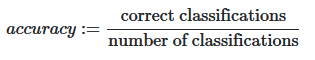

Therefore, with the dominance of "0" over "1", a high accuracy is achivable by a no skill model that only predicts the majority class. Furtheremore, in this situation, our model goal is to predict the minority class so as to prevent the worst case from discharging a very sick patient. 

The most interesting thing in the above table is that excluding the advanced models, we can see that Logistic Regression has the highest accuracy compared to Random Forest. The reason for this behavior has been mentioned in this blog. In which, it compares the effects of handling categorical features in Random Forest and Logistic Regression. Because of the calculation based on 'weights' in Logistic Regression, depending on the number assigned, the algorithm can treat certain categories with higher importance due to numerical encoding of categorical variables [12]. To avoid this, using one-hot encoding is better approach. However, the mismatch in model prediction of the unseen data would occurs, as the unseen data has two more categories which creates two more columns in the dataframe.





Next we will find the correlation between each metrics to evaluate the best model for tuning

In [ ]:
result_df.corr()

,F1,recall,precision,brier score,MCC,accuracy,ROC_AUC,balanced accuracy
F1,1.000000,0.946533,-0.741394,0.811849,0.131358,-0.792687,-0.205760,0.981725
recall,0.946533,1.000000,-0.831110,0.930443,-0.072648,-0.935050,-0.359111,0.965480
precision,-0.741394,-0.831110,1.000000,-0.861986,0.564177,0.918506,0.770040,-0.698545
brier score,0.811849,0.930443,-0.861986,1.000000,-0.307047,-0.975510,-0.592394,0.820809
MCC,0.131358,-0.072648,0.564177,-0.307047,1.000000,0.399873,0.898347,0.173753
accuracy,-0.792687,-0.935050,0.918506,-0.975510,0.399873,1.000000,0.622553,-0.810428
ROC_AUC,-0.205760,-0.359111,0.770040,-0.592394,0.898347,0.622553,1.000000,-0.136016
balanced accuracy,0.981725,0.965480,-0.698545,0.820809,0.173753,-0.810428,-0.136016,1.000000


As presented above, it is the trade off between the precision and recall. Therefore, to choose the best metric for the hyper tuning, the MCC score is a good choice as it correlates the most with the precision and has the lowest correlation score with recall. At the same time, it has lower correlation score than the brier score compared to ROC_AUC score. Moreover, it is suggested in this blog that MCC should be considered over F1, accuracy. As the blog mentioned that the MCC score is unaffected by the unbalanced datasets issue and can bring more values to the metric evaluation. In the confusion matrix in all the models above, the TP is usually the smallest values compared to others, therefore, the F1 score should be used with care as their main flaw is that they give equal weight to precision and recall (TP is the main numerator in both calculation). Therefore, a classifcation on a sick person as healthy has a different cost from the classification on a healthy person as sick. 

To conclude, the two metrics that should be considered in this case are MCC and ROC_AUC. In which, MCC score should be more prioritized.



## Evaluation graph

Next is to plot a classification graph to see how much perfectly the model without any tuning or using any k-fold(using the same split) to see how good calibrated are they.

Logistic:
	Brier: 0.127
Random forest:
	Brier: 0.140
Decision Tree:
	Brier: 0.216
K nearest neighbor:
	Brier: 0.144
XgBoost:
	Brier: 0.119
Naive Bayes:
	Brier: 0.175
CatBoost:
	Brier: 0.118


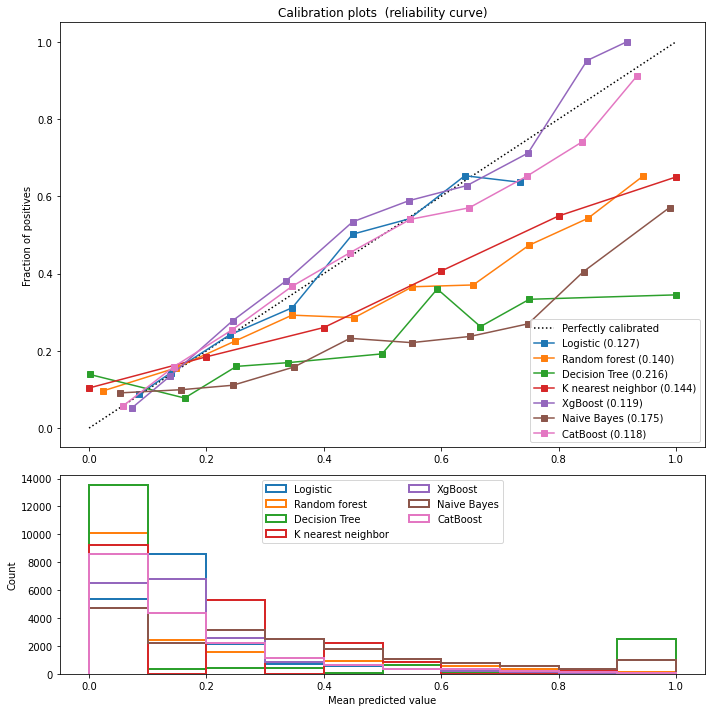

In [ ]:
from sklearn.calibration import calibration_curve
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(logreg, 'Logistic'),
                  (random_forest, 'Random forest'),
                  (decision_tree, 'Decision Tree'),
                  (knn, 'K nearest neighbor'),
                  (xg, 'XgBoost'),
                  (gnb,'Naive Bayes'),
                  (cat,'CatBoost')]:
    clf.fit(X_train, Y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    clf_score = brier_score_loss(Y_test, prob_pos, pos_label=Y.max())
    print("%s:" % name)
    print("\tBrier: %1.3f" % (clf_score))
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(Y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

The above shows the perfectly calibrated models which are calculated by brier loss score. The CatBoost and the XgBoost are expected to be perfectly calibrated. Interestingly, the Logistic Regression has done so well on the dataset without hypertuning, however, there are some parts in the graph above that the model itself does not cover. 

While the random forest classifier has shown a not so bad classifier itself, the variant of it (Decision Tree) has the worst calibration rate.  

# K-fold & Hypertuning

Next we will select Logistic Regression, Random Forest, Naive Bayes, XGboost and Catboost to apply the k-fold cross validation and hypertuning to see the best outcomes for each model for final evaluation. 

In [ ]:
from sklearn import model_selection

kFold = model_selection.KFold(n_splits=5, shuffle=False)

In [ ]:
from sklearn.metrics import make_scorer
mcc = make_scorer(matthews_corrcoef)

## Naive Bayes

According to sklearn, this model have var_smoothing for the portion of the largest variances of all features and the priors for the prior probabilities of the classes. In this hypertuning, only the var_smoothing is used.

In [ ]:
hyper = {'var_smoothing': np.logspace(0,-9, num=100)}
gd=GridSearchCV(gnb,hyper,cv=kFold,verbose=True, n_jobs=1,scoring=mcc)

gd.fit(X_train,Y_train)
print("tuned hpyerparameters :(best parameters) ",gd.best_params_)
print("best score ",gd.best_score_)
print("best estimator ",gd.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


tuned hpyerparameters :(best parameters)  {'var_smoothing': 8.111308307896873e-06}
best score  0.27049926097754906
best estimator  GaussianNB(priors=None, var_smoothing=8.111308307896873e-06)


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   13.9s finished


In [ ]:
gnb = gd.best_estimator_
Y_pred = gnb.fit(X_train, Y_train).predict_proba(X_test)[:,1]
acc_gnb = accuracy_score(Y_test,Y_pred.round()) * 100
print(acc_gnb)

82.8904947192885


In [ ]:
conf_mat_gnb = confusion_matrix(Y_test, Y_pred.round())
print(conf_mat_gnb)

[[14151   774]
 [ 2304   761]]


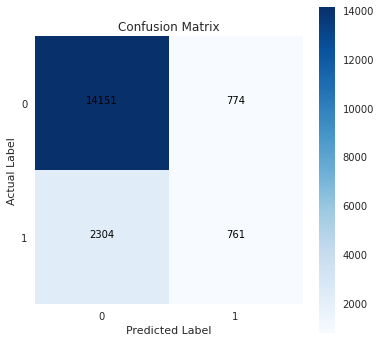

In [ ]:
plot_confusion_matrix_def(conf_mat_gnb)

In [ ]:
# Precision & Recall
precision_gnb = precision_score(Y_test, Y_pred.round())
print("Precision:", precision_gnb)
recall_gnb = recall_score(Y_test, Y_pred.round())
print("Recall:",recall_gnb) 

Precision: 0.49576547231270357
Recall: 0.24828711256117456


In [ ]:
# F Score
f1_gnb = f1_score(Y_test, Y_pred.round())
f1_gnb

0.3308695652173913

In [ ]:
brier_naive_bayes = brier_score_loss(Y_test, Y_pred, pos_label=2)
brier_naive_bayes

0.08860711491763487

In [ ]:
mcc_naive_bayes = matthews_corrcoef(Y_test,Y_pred.round())
mcc_naive_bayes

0.2643457084594279

In [ ]:
roc_auc_naive_bayes = roc_auc_score(Y_test, Y_pred)
roc_auc_naive_bayes

0.6924581909001233

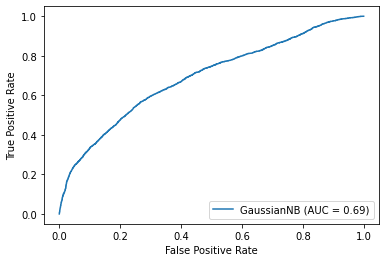

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(gnb, X_test, Y_test)  
plt.show() 

## Random Forest

The RandomForestClassifier library in sklearn has a lot of hyperparameters for tuning but for the sake of simplicity, only the max_depth of the tree model is tuned.

In [ ]:
hyper = {'max_depth':range(7, 10)}
gd=GridSearchCV(random_forest,hyper,cv=kFold,verbose=True, n_jobs=-1,scoring=mcc)

gd.fit(X_train,Y_train)
print("tuned hpyerparameters :(best parameters) ",gd.best_params_)
print("best score ",gd.best_score_)
print("best estimator ",gd.best_estimator_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   23.9s finished


tuned hpyerparameters :(best parameters)  {'max_depth': 9}
best score  0.2600501259670377
best estimator  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
random_forest = gd.best_estimator_
Y_pred = random_forest.fit(X_train, Y_train).predict_proba(X_test)[:,1]
acc_random_forest = accuracy_score(Y_test,Y_pred.round()) * 100
print(acc_random_forest)

84.18565869927738


In [ ]:
# Random forest confusion matrix
conf_mat_random_forest = confusion_matrix(Y_test, Y_pred.round())
conf_mat_random_forest

array([[14692,   233],
       [ 2612,   453]])

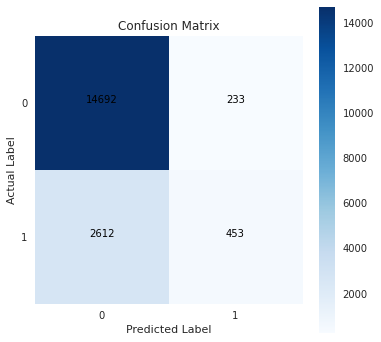

In [ ]:
plot_confusion_matrix_def(conf_mat_random_forest)

In [ ]:
# Precision & Recall
precision_random_forest = precision_score(Y_test, Y_pred.round())
print("Precision:", precision_random_forest)
recall_random_forest = recall_score(Y_test, Y_pred.round())
print("Recall:",recall_random_forest)

Precision: 0.6603498542274052
Recall: 0.14779771615008155


In [ ]:
# F Score
f1_random_forest = f1_score(Y_test, Y_pred.round())
f1_random_forest

0.24153559050919754

In [ ]:
brier_random_forest = brier_score_loss(Y_test, Y_pred, pos_label=2)
brier_random_forest

0.043725189568565546

In [ ]:
mcc_random_forest = matthews_corrcoef(Y_test,Y_pred.round())
mcc_random_forest

0.25949179471083755

In [ ]:
roc_random_forest = roc_auc_score(Y_test, Y_pred)
roc_random_forest

0.7730001502892385

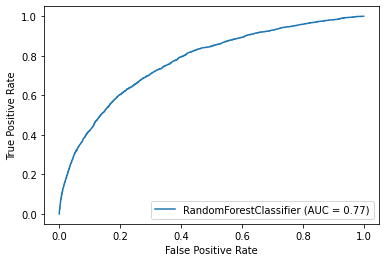

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(random_forest, X_test, Y_test)  
plt.show() 

## Logistic Regression

For the Logistic Regression model, the solver that needs for tuning are presented below. It is stated in the document that liblinear is used for small dataset, whereas the 'saga' for the large dataset, however, the saga process too long so liblinear is used instead. The penalty is the regularization for the model, where L1 used by the Lasso Regression and L2 used by Ridge Regression. The parameter C is to boost the inverse of the regularization strength.

In [ ]:
hyper ={'penalty' : ['l1', 'l2'],'C' : np.logspace(-4, 4, 20),'solver' : ['liblinear']}
gd=GridSearchCV(logreg,hyper,cv=kFold,verbose=True, n_jobs=-1,scoring=mcc)

gd.fit(X_train,Y_train)
print("tuned hyperparameters :(best parameters) ",gd.best_params_)
print("best score ",gd.best_score_)
print("best estimator ",gd.best_estimator_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.6min finished


tuned hyperparameters :(best parameters)  {'C': 3792.690190732246, 'penalty': 'l2', 'solver': 'liblinear'}
best score  0.21576061682984937
best estimator  LogisticRegression(C=3792.690190732246, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
logreg = gd.best_estimator_
Y_pred = logreg.fit(X_train, Y_train).predict_proba(X_test)[:,1]
acc_log_reg = accuracy_score(Y_test,Y_pred.round()) * 100
print(acc_log_reg)

83.54085603112841


In [ ]:
# Logistic regression confusion matrix
conf_mat_log_reg = confusion_matrix(Y_test, Y_pred.round())
conf_mat_log_reg

array([[14672,   253],
       [ 2708,   357]])

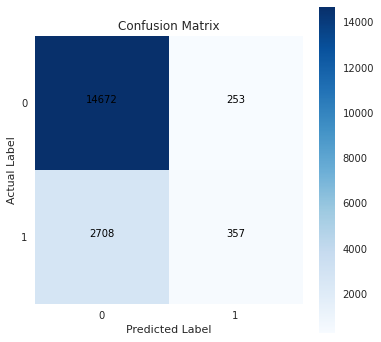

In [ ]:
plot_confusion_matrix_def(conf_mat_log_reg)

In [ ]:
# Precision & Recall
precision_log_reg = precision_score(Y_test, Y_pred.round())
print("Precision:", precision_log_reg)
recall_log_reg = recall_score(Y_test, Y_pred.round())
print("Recall:",recall_log_reg)

Precision: 0.5852459016393443
Recall: 0.1164763458401305


In [ ]:
# F Score
f1_log_reg = f1_score(Y_test, Y_pred.round())
f1_log_reg

0.19428571428571428

In [ ]:
brier_log_reg = brier_score_loss(Y_test, Y_pred, pos_label=2)
brier_log_reg

0.04147645496175336

In [ ]:
mcc_log_reg = matthews_corrcoef(Y_test,Y_pred.round())
mcc_log_reg

0.20673521110802592

In [ ]:
roc_logreg = roc_auc_score(Y_test, Y_pred)
roc_logreg

0.6970656436068324

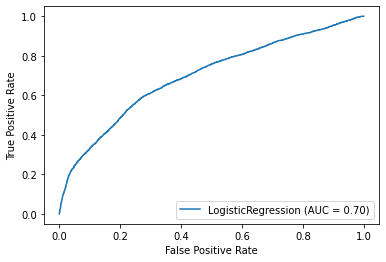

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(logreg, X_test, Y_test)  
plt.show() 

## XgBoost

For the following advanced models, simple parameters would use to minimize the running time of the model. As mentioned above, XgBoost is an ensembled tree model itself, therefore, we would tune the max_depth of it. Moreover, as the algorithm is all about the learning of the previous work and boosting the performance from it, it would requires many steps to reach the optimum of the model. Therefore, the learning rate is the shrinkage you do at every step you are making. Hence, the learning rate needs to be low value. 

In [ ]:
np.arange(0,0.2,0.02)

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18])

In [ ]:
hyper = {'max_depth': range(4,7),
        'learning_rate':np.arange(0,0.3,0.01)}

In [ ]:
gd=GridSearchCV(xg,hyper,cv=kFold,verbose=True, n_jobs=-1,scoring=mcc)

gd.fit(X_train,Y_train)
print("tuned hyperparameters :(best parameters) ",gd.best_params_)
print("best score ",gd.best_score_)
print("best estimator ",gd.best_estimator_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 17.2min finished


tuned hyperparameters :(best parameters)  {'learning_rate': 0.22, 'max_depth': 5}
best score  0.29924701091840733
best estimator  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.22, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
xg = gd.best_estimator_
Y_pred = xg.fit(X_train, Y_train).predict_proba(X_test)[:,1]
acc_xg = accuracy_score(Y_test,Y_pred.round()) * 100
print(acc_xg)

84.16898276820456


In [ ]:
# XgBoost confusion matrix
conf_mat_xg = confusion_matrix(Y_test, Y_pred.round())
conf_mat_xg

array([[14566,   359],
       [ 2454,   611]])

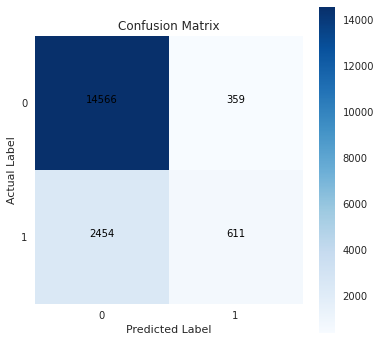

In [ ]:
plot_confusion_matrix_def(conf_mat_xg)

In [ ]:
# Precision & Recall
precision_xg = precision_score(Y_test, Y_pred.round())
print("Precision:", precision_xg)
recall_xg = recall_score(Y_test, Y_pred.round())
print("Recall:",recall_xg)

Precision: 0.6239583333333333
Recall: 0.19543230016313215


In [ ]:
# F Score
f1_xg = f1_score(Y_test, Y_pred.round())
f1_xg

0.29763975155279504

In [ ]:
brier_xg = brier_score_loss(Y_test, Y_pred, pos_label=2)
brier_xg

0.053381647594335765

In [ ]:
mcc_xg = matthews_corrcoef(Y_test,Y_pred.round())
mcc_xg

0.2864485290040219

In [ ]:
roc_xg = roc_auc_score(Y_test, Y_pred)
roc_xg

0.7813429627747218

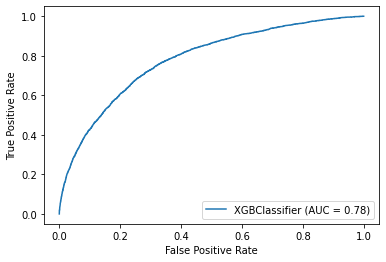

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(xg, X_test, Y_test)  
plt.show() 

## Catboost

The CatBoost model process for hypertuning is slow so the hyperpameters should be not much.

In [ ]:
# Defining your search space
params = {'depth':range(4,7),'learning_rate':np.arange(0,0.05,0.005)}

In [ ]:
np.arange(0,0.05,0.007)

array([0.   , 0.007, 0.014, 0.021, 0.028, 0.035, 0.042, 0.049])

In [ ]:
gd = GridSearchCV(cat,params,scoring=mcc,cv=kFold,n_jobs=-1,return_train_score=False)
gd.fit(X_train,Y_train)
print("tuned hyperparameters :(best parameters) ",gd.best_params_)
print("best score ",gd.best_score_)
print("best estimator ",gd.best_estimator_)

tuned hyperparameters :(best parameters)  {'depth': 5, 'learning_rate': 0.045}
best score  0.30102369497953696
best estimator  <catboost.core.CatBoostClassifier object at 0x7f8a88aae550>


In [ ]:
cat = gd.best_estimator_
Y_pred = cat.fit(X_train, Y_train).predict_proba(X_test)[:,1]
acc_cat = accuracy_score(Y_test,Y_pred.round()) * 100
print(acc_cat)

84.1467481934408


In [ ]:
# CatBoost confusion matrix
conf_mat_cat = confusion_matrix(Y_test, Y_pred.round())
conf_mat_cat

array([[14534,   391],
       [ 2461,   604]])

In [ ]:
# Precision & Recall
precision_cat = precision_score(Y_test, Y_pred.round())
print("Precision:", precision_cat)
recall_cat = recall_score(Y_test, Y_pred.round())
print("Recall:",recall_cat)

Precision: 0.607035175879397
Recall: 0.1970636215334421


In [ ]:
# F Score
f1_cat = f1_score(Y_test, Y_pred.round())
f1_cat

0.29753694581280793

In [ ]:
brier_cat = brier_score_loss(Y_test, Y_pred, pos_label=2)
brier_cat

0.05329248597705356

In [ ]:
mcc_cat = matthews_corrcoef(Y_test,Y_pred.round())
mcc_cat

0.2810320505500294

In [ ]:
roc_cat = roc_auc_score(Y_test, Y_pred)
roc_cat

0.7820776858736314

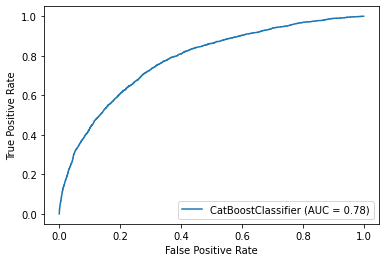

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(cat, X_test, Y_test)  
plt.show() 

# Final Evaluation

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest', 
              'XGboost','Naive Bayes','CatBoost'],
    'F1': [f1_log, f1_random_forest, f1_xgBoost,f1_gnb,f1_cat],
    'recall': [recall_log, recall_random_forest, recall_xgBoost,recall_gnb,recall_cat],
    'precision': [precision_log, precision_random_forest, precision_xgBoost,precision_gnb,precision_cat],
    'brier score': [brier_log_reg, brier_random_forest, brier_xgboost,brier_naive_bayes,brier_cat],
    'MCC': [mcc_log_reg, mcc_random_forest, mcc_xgboost,mcc_naive_bayes,mcc_cat],
    'accuracy':[acc_log,acc_random_forest,acc_xgBoost,acc_gnb,acc_cat],
    'ROC_AUC':[roc_log_reg,roc_random_forest,roc_xg,roc_gnb,roc_cat]})
result_df = results.sort_values(by='MCC', ascending=False)
result_df

,Model,F1,recall,precision,brier score,MCC,accuracy,ROC_AUC
4,CatBoost,0.298072,0.196737,0.614679,0.052477,0.283816,84.213452,0.782707
3,Naive Bayes,0.330870,0.248287,0.495765,0.088607,0.264346,82.890495,0.693462
1,Random Forest,0.241536,0.147798,0.660350,0.043725,0.259492,84.185659,0.773000
2,XGboost,0.232906,0.142251,0.642121,0.045747,0.248509,84.035575,0.781343
0,Logistic Regression,0.192528,0.115171,0.586379,0.041476,0.206735,83.540856,0.697109


The above table summarize the hypertuning models. Although the MCC score of the Naive Bayes is at the second place, the ROC_AUC score is lower than other model which indicates that this is not a good prediction model. More interestingly, the Random Forest has a higher MCC score than the XgBoost which can bring a question: 'Are the hyperparameters above good enough or not?' because the expected result should be vice versa. Finally, CatBoost would be used as the model for the unseen prediction data.


Logistic:
	Brier: 0.127
Random forest:
	Brier: 0.119
XgBoost:
	Brier: 0.117
Naive Bayes:
	Brier: 0.139
CatBoost:
	Brier: 0.117


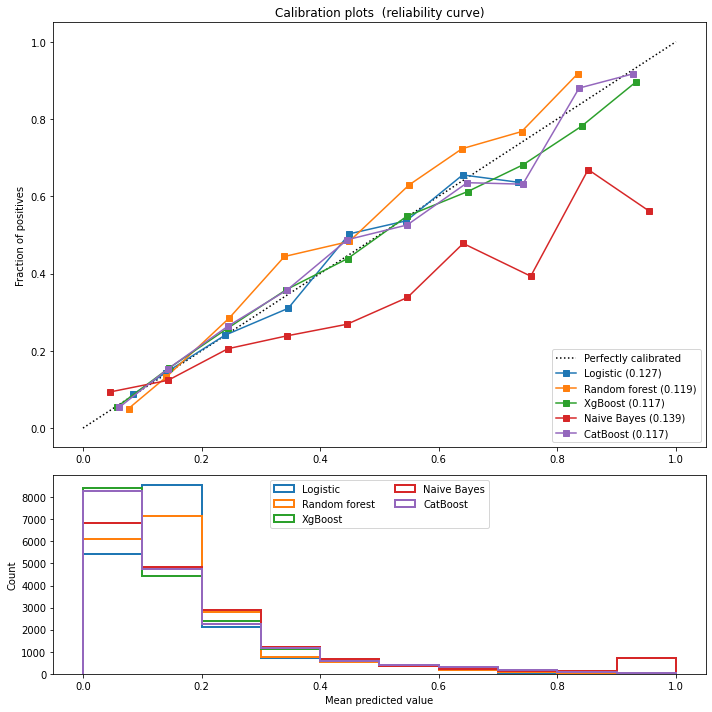

In [ ]:
from sklearn.calibration import calibration_curve
plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(logreg, 'Logistic'),
                  (random_forest, 'Random forest'),
                  (xg, 'XgBoost'),
                  (gnb,'Naive Bayes'),
                  (cat,'CatBoost')]:
    clf.fit(X_train, Y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    clf_score = brier_score_loss(Y_test, prob_pos, pos_label=Y.max())
    print("%s:" % name)
    print("\tBrier: %1.3f" % (clf_score))
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(Y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()

From the calibrated models graph above, we can see why the Random Forest surpass the XgBoost. It lacks of a few data points at the end. Moreover, the Logistic Regression also shares the same trend as it eliminates some data points at the end of the line.

## Calibrate classifier

Next the Calibrated Classifier CV will be used to see if our model has been fitted or not.

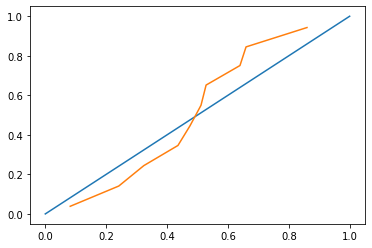

In [ ]:
from sklearn.calibration import CalibratedClassifierCV 
calib_model = CalibratedClassifierCV(base_estimator = cat, cv=kFold) 
calib_model.fit(X_train, Y_train) 
prob = calib_model.predict_proba(X_test)[:, 1]

#plot the calibration curve (see above to know what is it)
x_p, y_p = calibration_curve(Y_test, prob, n_bins=10, normalize='True') 
plt.plot([0, 1], [0, 1]) 
plt.plot(x_p, y_p) 
plt.show()

In [ ]:
from sklearn.metrics import brier_score_loss, roc_auc_score

Y_pred = calib_model.predict_proba(X_test)[:,1]
brier_calibrate = brier_score_loss(Y_test, y_pred, pos_label=2)
roc_auc_calibrate = roc_auc_score(Y_test, y_pred)
print("brier score ",brier_calibrate)
print("ROC_AUC score ",roc_auc_calibrate)

brier score  0.05209021395331721
ROC_AUC score  0.7825769959094001


In [ ]:
# CatBoost confusion matrix
confusion_matrix(Y_test, Y_pred.round())

array([[14516,   409],
       [ 2436,   629]])

In [ ]:
# Precision & Recall
precision_calibrate = precision_score(Y_test, Y_pred.round())
print("Precision:", precision_calibrate)
recall_calibrate = recall_score(Y_test, Y_pred.round())
print("Recall:",recall_calibrate)

Precision: 0.6059730250481695
Recall: 0.20522022838499185


In [ ]:
# F Score
f1_calibrate = f1_score(Y_test, Y_pred.round())
f1_calibrate

0.30660492322690713

In [ ]:
mcc_calibrate = matthews_corrcoef(Y_test,Y_pred.round())
mcc_calibrate

0.2867051038021376

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred.round()))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91     14925
           1       0.61      0.21      0.31      3065

    accuracy                           0.84     17990
   macro avg       0.73      0.59      0.61     17990
weighted avg       0.81      0.84      0.81     17990



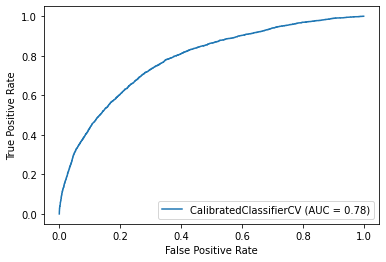

In [ ]:
from sklearn import metrics
metrics.plot_roc_curve(calib_model, X_test, Y_test)  
plt.show() 

In [ ]:
pd.DataFrame({
    'Model': ['CatBoost', 
              'Calibrated CatBoost'],
    'F1': [f1_cat,f1_calibrate],
    'recall': [recall_cat,recall_calibrate],
    'precision': [precision_cat,precision_calibrate],
    'brier score': [brier_cat,brier_calibrate],
    'ROC_AUC score':[roc_cat,roc_auc_calibrate],
    'MCC':[mcc_cat,mcc_calibrate]})

,Model,F1,recall,precision,brier score,ROC_AUC score,MCC
0,CatBoost,0.297537,0.197064,0.607035,0.053292,0.782078,0.281032
1,Calibrated CatBoost,0.306605,0.205220,0.605973,0.052090,0.782577,0.286705


With the results as above, it does not change much and this suggests that the model is well-calibrated.

# Prediction for test_data.csv

In [ ]:
zip_file = ZipFile('/content/drive/MyDrive/Sem 1-2021/Machine Learning/COSC2673_2793_Assign1_Data.zip')
test_df = pd.read_csv(zip_file.open('test_data.csv'), header=0, sep=',', quotechar='"',delimiter=",")
test_df.head()

,ID,HealthServiceArea,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode
0,1,New York City,F,Other Race,Newborn,216,3,Medicaid,4900,N,3242,8966,2448,13196,34
1,2,New York City,F,White,Newborn,220,1,Medicaid,3100,N,2611,9227,1751,8951,45
2,3,New York City,M,Multi-racial,Newborn,115,1,Medicaid,3300,N,3155,11381,1052,11314,74
3,4,New York City,M,Other Race,Newborn,228,1,Medicaid,3300,N,2611,9227,3790,6250,45
4,5,New York City,F,Other Race,Newborn,220,2,Medicaid,3800,N,3155,11381,3032,10135,59


In [ ]:
id_copy = test_df['ID']
id_copy

0            1
1            2
2            3
3            4
4            5
         ...  
69172    69173
69173    69174
69174    69175
69175    69176
69176    69177
Name: ID, Length: 69177, dtype: int64

In [ ]:
test_df.drop(['HealthServiceArea','ID'],inplace=True,axis=1)

In [ ]:
test_df['TypeOfAdmission'] = change_label_encoder(test_df['TypeOfAdmission'])
test_df['PaymentTypology'] = change_label_encoder(test_df['PaymentTypology'])
test_df['Gender'] = change_label_encoder(test_df['Gender'])
test_df['Race'] = change_label_encoder(test_df['Race'])

In [ ]:
test_df['EmergencyDepartmentIndicator'] = test_df.apply(lambda x : convert_EmergencyDepartmentIndicator(x['EmergencyDepartmentIndicator']), axis=1)

In [ ]:
standardization(test_df)

In [ ]:
test_df.columns.difference(X.columns)

Index([], dtype='object')

In [ ]:
test_df= test_df.loc[:,X.columns]

In [ ]:
test_df.head(10)

,APRSeverityOfIllnessCode,AverageChargesInCounty,AverageChargesInFacility,AverageCostInCounty,AverageCostInFacility,AverageIncomeInZipCode,BirthWeight,CCSProcedureCode,EmergencyDepartmentIndicator,Gender,PaymentTypology,Race,TypeOfAdmission
0,3,0.366297,1.364336,0.950981,-0.067749,34,3.597070,216,0,0,4,2,2
1,1,0.458682,0.266094,0.081107,-0.561802,45,-0.528034,220,0,0,4,3,2
2,1,1.221123,0.877436,0.831046,-1.057273,74,-0.069689,115,0,1,4,1,2
3,1,0.458682,-0.432693,0.081107,0.883499,45,-0.069689,228,0,1,4,2,2
4,2,1.221123,0.572412,0.831046,0.346207,59,1.076173,220,0,0,4,2,2
5,2,0.366297,0.957379,0.950981,-0.208805,34,0.159484,228,0,0,0,2,2
6,3,1.221123,0.962294,0.831046,-0.976466,34,1.305346,220,0,1,4,2,2
7,1,0.702918,-0.308769,-0.704675,0.536882,59,0.388656,228,0,0,4,2,2
8,1,1.221123,0.572412,0.831046,0.346207,57,0.617828,220,0,1,4,2,2
9,1,1.221123,1.172370,0.831046,-0.716326,57,-0.986379,228,0,0,0,3,2


In [ ]:
pred = cat.predict(test_df)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
pred_result = pd.DataFrame({"ID":id_copy,"LengthOfStay":pred})

In [ ]:
pred_result

,ID,LengthOfStay
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
69172,69173,0
69173,69174,0
69174,69175,0
69175,69176,0


In [ ]:
pred_result.to_csv(r'/content/drive/MyDrive/Sem 1-2021/Machine Learning/s3695662.csv',index=False)

# Reference





[1] "Barriers to timely discharge from the general medicine service at an academic teaching hospital", 2013.

[2] "Hospital Readmissions of Discharged Patients with COVID-19", 2020.

[3] "ZIP Code Rankings | Highest Income ZIP Codes", Proximityone.com, 2021. [Online]. Available: http://proximityone.com/acs0913_zips.htm. [Accessed: 16- Apr- 2021].

[4] W. Normalizer? and S. Panchal, "When to use Standard Scaler and when Normalizer?", Data Science Stack Exchange, 2021. [Online]. Available: https://datascience.stackexchange.com/questions/45900/when-to-use-standard-scaler-and-when-normalizer. [Accessed: 16- Apr- 2021].

[5]"The advantages of the Matthews correlation coefficient (MCC) over F1 score and accuracy in binary classification evaluation", 2020. 

[6]"Brier Score - How to measure accuracy of probablistic predictions - ML+", ML+, 2021. [Online]. Available: https://www.machinelearningplus.com/statistics/brier-score/. [Accessed: 16- Apr- 2021].

[7]"How Decision Tree Algorithm works", Dataaspirant, 2021. [Online]. Available: https://dataaspirant.com/how-decision-tree-algorithm-works/. [Accessed: 16- Apr- 2021].

[8]k. classes and P. Smit, "kNN and unbalanced classes", Cross Validated, 2021. [Online]. Available: https://stats.stackexchange.com/questions/341/knn-and-unbalanced-classes. [Accessed: 16- Apr- 2021].

[9]"All about Naive Bayes", Medium, 2021. [Online]. Available: https://towardsdatascience.com/all-about-naive-bayes-8e13cef044cf. [Accessed: 16- Apr- 2021].

[10]"XGBoost Algorithm: Long May She Reign!", Medium, 2021. [Online]. Available: https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d. [Accessed: 16- Apr- 2021].

[11]"XGBoost Algorithm: Long May She Reign!", Medium, 2021. [Online]. Available: https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d. [Accessed: 16- Apr- 2021].

[12]"Random Forest vs Logistic Regression", Medium, 2021. [Online]. Available: https://medium.com/@bemali_61284/random-forest-vs-logistic-regression-16c0c8e2484c. [Accessed: 16- Apr- 2021].



